In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import single, average, complete, fcluster, linkage
import re
from sklearn.metrics import adjusted_rand_score, jaccard_score
from itertools import combinations

In [ ]:
mummer_file_path = '/home/ubuntu/wdir/PopGenStats_Project/data/B_breve/distances/mummer.tsv.gz'
skani_file_path = '/home/ubuntu/wdir/PopGenStats_Project/data/B_breve/distances/skani.tsv.gz'
parsnp_file_path = '/home/ubuntu/wdir/PopGenStats_Project/data/B_breve/distances/parsnp.tsv.gz'

skder_file_path = '/home/ubuntu/wdir/PopGenStats_Project/data/B_breve/dereplication/skder.clusters.tsv.gz'
cidder_file_path = '/home/ubuntu/wdir/PopGenStats_Project/data/B_breve/dereplication/cidder.clusters.tsv.gz'
drep_file_path = '/home/ubuntu/wdir/PopGenStats_Project/data/B_breve/dereplication/drep.clusters.csv.gz'
galah_file_path = '/home/ubuntu/wdir/PopGenStats_Project/data/B_breve/dereplication/galah.clusters.tsv.gz'

meta_file_path = '/home/ubuntu/wdir/PopGenStats_Project/data/B_breve/dereplication/meta.tsv.gz'

In [95]:
mummer_matrix = pd.read_csv(mummer_file_path, sep='\t', index_col=0)
skani_matrix = pd.read_csv(skani_file_path, sep='\t')
parsnp_matrix = pd.read_csv(parsnp_file_path, sep='\t')

mummer_matrix['Tool'] = 'mummer'
skani_matrix['Tool'] = 'skANI'
parsnp_matrix['Tool'] = 'ParSNP'

In [96]:
def edit_accession_id(str):
    match = re.search(r'(GCF_|GCA_)\d{9}\.\d|flye.SQK-NBD\d{3}-\d{2}_barcode\d{2}', str)
    if match:
        return match.group(0)
    return None

In [97]:
mummer_matrix['s1'] = mummer_matrix['s1'].apply(edit_accession_id)
mummer_matrix['s2'] = mummer_matrix['s2'].apply(edit_accession_id)

mummer_matrix['score1'] = mummer_matrix['avg_identity1'] * (mummer_matrix['prc_aligned1'] / 100)
mummer_matrix['score2'] = mummer_matrix['avg_identity2'] * (mummer_matrix['prc_aligned2'] / 100)

mummer_sample_names = sorted(set(mummer_matrix['s1']) | set(mummer_matrix['s2']))
mummer_mapper = {name: f'sample{idx}' for idx, name in enumerate(mummer_sample_names)}

mummer_matrix['ref'] = mummer_matrix['s1'].map(mummer_mapper)
mummer_matrix['query'] = mummer_matrix['s2'].map(mummer_mapper)

mummer_matrix

,prc_aligned1,prc_aligned2,avg_identity1,avg_identity2,s1,s2,Tool,score1,score2,ref,query
0,100.0000,99.6978,99.9900,99.9900,flye.SQK-NBD114-96_barcode01,flye.SQK-NBD114-96_barcode02,mummer,99.990000,99.687830,sample255,sample256
1,99.9628,99.6568,99.9900,99.9900,flye.SQK-NBD114-96_barcode01,flye.SQK-NBD114-96_barcode03,mummer,99.952804,99.646834,sample255,sample257
2,100.0000,99.6925,99.9900,99.9900,flye.SQK-NBD114-96_barcode01,flye.SQK-NBD114-96_barcode04,mummer,99.990000,99.682531,sample255,sample258
3,100.0000,99.6978,99.9900,99.9900,flye.SQK-NBD114-96_barcode01,flye.SQK-NBD114-96_barcode05,mummer,99.990000,99.687830,sample255,sample259
4,100.0000,99.6978,99.9900,99.9900,flye.SQK-NBD114-96_barcode01,flye.SQK-NBD114-96_barcode07,mummer,99.990000,99.687830,sample255,sample260
...,...,...,...,...,...,...,...,...,...,...,...
39055,90.5130,87.3907,98.7887,98.7887,GCF_902505485.1,GCF_925285005.1,mummer,89.416616,86.332136,sample251,sample253
39056,87.2772,90.8543,98.8948,98.8948,GCF_902505485.1,GCF_925318455.1,mummer,86.312612,89.850178,sample251,sample254
39057,90.2153,83.6526,98.8550,98.8550,GCF_925281835.1,GCF_925285005.1,mummer,89.182335,82.694778,sample252,sample253
39058,90.5095,90.5183,99.0143,99.0143,GCF_925281835.1,GCF_925318455.1,mummer,89.617348,89.626061,sample252,sample254


In [98]:
skani_matrix['Ref_file'] = skani_matrix['Ref_file'].apply(edit_accession_id)
skani_matrix['Query_file'] = skani_matrix['Query_file'].apply(edit_accession_id)

skani_matrix['score1'] = skani_matrix['ANI'] * (skani_matrix['Align_fraction_ref'] / 100)
skani_matrix['score2'] = skani_matrix['ANI'] * (skani_matrix['Align_fraction_query'] / 100)

skani_sample_names = sorted(set(skani_matrix['Ref_file']) | set(skani_matrix['Query_file']))
skani_mapper = {name: f'sample{idx}' for idx, name in enumerate(skani_sample_names)}

skani_matrix['ref'] = skani_matrix['Ref_file'].map(skani_mapper)
skani_matrix['query'] = skani_matrix['Query_file'].map(skani_mapper)

skani_matrix

,Ref_file,Query_file,ANI,Align_fraction_ref,Align_fraction_query,Ref_name,Query_name,Tool,score1,score2,ref,query
0,flye.SQK-NBD114-96_barcode01,GCF_020538545.1,98.65,84.02,83.90,contig_1 rotated=True rotated_gene=dnaA,NZ_JAJBOO010000001.1 Bifidobacterium breve str...,skANI,82.885730,82.767350,sample255,sample164
1,flye.SQK-NBD114-96_barcode01,GCA_959020545.1,98.48,84.98,87.05,contig_1 rotated=True rotated_gene=dnaA,CAUESD010000001.1 MAG TPA_asm: Bifidobacterium...,skANI,83.688304,85.726840,sample255,sample30
2,flye.SQK-NBD114-96_barcode01,GCF_028203385.1,98.31,84.59,83.21,contig_1 rotated=True rotated_gene=dnaA,NZ_JAQKHH010000010.1 Bifidobacterium breve str...,skANI,83.160429,81.803751,sample255,sample219
3,flye.SQK-NBD114-96_barcode01,GCF_002838285.1,98.47,83.69,84.40,contig_1 rotated=True rotated_gene=dnaA,NZ_CP021386.1 Bifidobacterium breve strain NRB...,skANI,82.409543,83.108680,sample255,sample85
4,flye.SQK-NBD114-96_barcode01,GCF_019126245.1,98.51,84.09,83.98,contig_1 rotated=True rotated_gene=dnaA,NZ_JAHOCU010000010.1 Bifidobacterium breve str...,skANI,82.837059,82.728698,sample255,sample140
...,...,...,...,...,...,...,...,...,...,...,...,...
39055,GCF_002861455.1,GCF_019052255.1,98.30,82.17,80.95,NZ_PKGQ01000001.1 Bifidobacterium breve strain...,NZ_JAHQUR010000010.1 Bifidobacterium breve str...,skANI,80.773110,79.573850,sample109,sample133
39056,GCF_002861455.1,GCF_027214675.1,98.35,83.91,87.02,NZ_PKGQ01000001.1 Bifidobacterium breve strain...,NZ_JAPWEY010000009.1 Bifidobacterium breve str...,skANI,82.525485,85.584170,sample109,sample188
39057,GCF_002861455.1,GCF_009429085.1,98.27,83.51,78.81,NZ_PKGQ01000001.1 Bifidobacterium breve strain...,NZ_CP045532.1 Bifidobacterium breve strain IDC...,skANI,82.065277,77.446587,sample109,sample121
39058,GCF_002861455.1,GCF_900637145.1,98.02,82.00,83.39,NZ_PKGQ01000001.1 Bifidobacterium breve strain...,NZ_LR134348.1 Bifidobacterium breve strain NCT...,skANI,80.376400,81.738878,sample109,sample243


In [99]:
parsnp_matrix['ANI_1'] = 100 - parsnp_matrix['prc']

parsnp_matrix['p1'] = parsnp_matrix['p1'].apply(edit_accession_id)
parsnp_matrix['p2'] = parsnp_matrix['p2'].apply(edit_accession_id)

parsnp_sample_names = sorted(set(parsnp_matrix['p1']) | set(parsnp_matrix['p2']))
parsnp_mapper = {name: f'sample{idx}' for idx, name in enumerate(parsnp_sample_names)}

parsnp_matrix['ref'] = parsnp_matrix['p1'].map(parsnp_mapper)
parsnp_matrix['query'] = parsnp_matrix['p2'].map(parsnp_mapper)

parsnp_matrix

,p1,p2,diff,prc,Tool,ANI_1,ref,query
0,GCF_027212565.1,GCF_027212575.1,6424,9.375091,ParSNP,90.624909,sample177,sample178
1,GCF_027212565.1,flye.SQK-NBD114-96_barcode07,8749,12.768162,ParSNP,87.231838,sample177,sample260
2,GCF_027212565.1,GCF_027212705.1,6421,9.370713,ParSNP,90.629287,sample177,sample180
3,GCF_027212565.1,GCF_029723395.1,6938,10.125215,ParSNP,89.874785,sample177,sample227
4,GCF_027212565.1,GCF_028203305.1,6957,10.152944,ParSNP,89.847056,sample177,sample218
...,...,...,...,...,...,...,...,...
39335,GCF_002838585.1,flye.SQK-NBD114-96_barcode14,8802,12.845509,ParSNP,87.154491,sample100,sample267
39336,GCF_002838585.1,GCF_000158015.1,5849,8.535945,ParSNP,91.464055,sample100,sample32
39337,GCF_003813065.1,flye.SQK-NBD114-96_barcode14,8828,12.883453,ParSNP,87.116547,sample115,sample267
39338,GCF_003813065.1,GCF_000158015.1,7,0.010216,ParSNP,99.989784,sample115,sample32


NUMBER OF SNPS BOXPLOTS

In [100]:
parsnp_matrix['alignment_size'] = parsnp_matrix['diff'] / (parsnp_matrix['prc']/100)
parsnp_matrix

,p1,p2,diff,prc,Tool,ANI_1,ref,query,alignment_size
0,GCF_027212565.1,GCF_027212575.1,6424,9.375091,ParSNP,90.624909,sample177,sample178,68522.0
1,GCF_027212565.1,flye.SQK-NBD114-96_barcode07,8749,12.768162,ParSNP,87.231838,sample177,sample260,68522.0
2,GCF_027212565.1,GCF_027212705.1,6421,9.370713,ParSNP,90.629287,sample177,sample180,68522.0
3,GCF_027212565.1,GCF_029723395.1,6938,10.125215,ParSNP,89.874785,sample177,sample227,68522.0
4,GCF_027212565.1,GCF_028203305.1,6957,10.152944,ParSNP,89.847056,sample177,sample218,68522.0
...,...,...,...,...,...,...,...,...,...
39335,GCF_002838585.1,flye.SQK-NBD114-96_barcode14,8802,12.845509,ParSNP,87.154491,sample100,sample267,68522.0
39336,GCF_002838585.1,GCF_000158015.1,5849,8.535945,ParSNP,91.464055,sample100,sample32,68522.0
39337,GCF_003813065.1,flye.SQK-NBD114-96_barcode14,8828,12.883453,ParSNP,87.116547,sample115,sample267,68522.0
39338,GCF_003813065.1,GCF_000158015.1,7,0.010216,ParSNP,99.989784,sample115,sample32,68522.0


In [101]:
parsnp_snp_matrix = parsnp_matrix[['p1', 'p2', 'diff', 'prc']]
parsnp_snp_matrix

,p1,p2,diff,prc
0,GCF_027212565.1,GCF_027212575.1,6424,9.375091
1,GCF_027212565.1,flye.SQK-NBD114-96_barcode07,8749,12.768162
2,GCF_027212565.1,GCF_027212705.1,6421,9.370713
3,GCF_027212565.1,GCF_029723395.1,6938,10.125215
4,GCF_027212565.1,GCF_028203305.1,6957,10.152944
...,...,...,...,...
39335,GCF_002838585.1,flye.SQK-NBD114-96_barcode14,8802,12.845509
39336,GCF_002838585.1,GCF_000158015.1,5849,8.535945
39337,GCF_003813065.1,flye.SQK-NBD114-96_barcode14,8828,12.883453
39338,GCF_003813065.1,GCF_000158015.1,7,0.010216


Text(0, 0.5, 'SNP count')

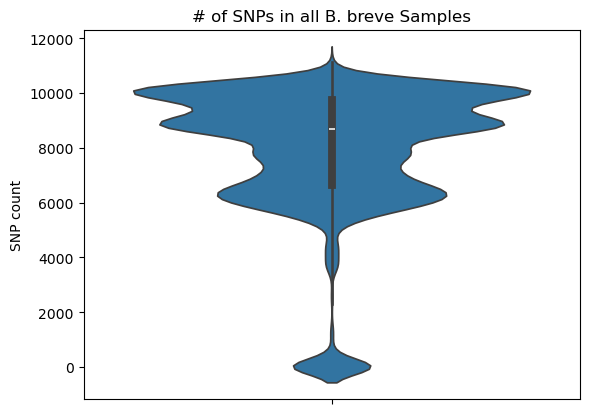

In [102]:
sns.violinplot(parsnp_snp_matrix, y='diff')
plt.title('# of SNPs in all B. breve Samples')
plt.ylabel('SNP count')

CHECK MIN ANI

In [103]:
skani_matrix['ANI'].min(), mummer_matrix['avg_identity1'].min(), parsnp_matrix['ANI_1'].min()

(np.float64(97.2), np.float64(97.8999), np.float64(83.73077259858148))

HOW MANY SAMPLES ARE OUR LAB'S ISOLATES?

In [104]:
# 280 samples total

unique_barcodes = mummer_matrix['s1'].str.contains(r'SQK-NBD114-96_barcode\d{2}', regex=True)
unique_names = mummer_matrix[unique_barcodes]['s1'].unique()
len(unique_names)

25

MAKE CLUSTERING MATRICES FOR EACH TOOL

In [105]:
mummer_diagonal_data = []
for sample in mummer_sample_names:
    mummer_diagonal_data.append({
        'prc_aligned1': 100,
        'prc_aligned2': 100,
        'avg_identity1': 100,
        'avg_identity2': 100,
        's1': sample,
        's2': sample,
        'ref': mummer_mapper[sample],
        'query': mummer_mapper[sample],
        'score1': 100,
        'score2': 100,
        'Tool': 'mummer'
    })

mummer_diagonal_df = pd.DataFrame(mummer_diagonal_data)
mummer_matrix = pd.concat([mummer_matrix, mummer_diagonal_df], ignore_index=True)

mummer_matrix = mummer_matrix.sort_values(by=['s1', 's2']).reset_index(drop=True)
mummer_matrix = mummer_matrix.drop_duplicates(['ref', 'query'])

mummer_upper_triangle = mummer_matrix.pivot(index='ref', columns='query', values='avg_identity1').fillna(0)
mummer_upper_triangle = mummer_upper_triangle[sorted(mummer_upper_triangle.columns)]

mummer_lower_triangle = mummer_matrix.pivot(index='query', columns='ref', values='avg_identity2').fillna(0)
mummer_lower_triangle = mummer_lower_triangle[sorted(mummer_lower_triangle.columns)]

new_mummer_matrix = mummer_upper_triangle + mummer_lower_triangle
new_mummer_matrix[:] = np.where(new_mummer_matrix==200, 100, new_mummer_matrix)

new_mummer_matrix

query,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ref,,,,,,,,,,,,,,,,,,,,,
sample0,100.0000,98.1306,98.8511,98.8492,98.9137,98.9121,98.9144,98.9136,98.9141,98.4479,...,98.8149,98.7475,98.7993,98.4484,98.9885,98.7775,98.7838,98.8221,98.9547,98.8586
sample1,98.1306,100.0000,98.0144,98.0398,98.1113,98.1104,98.1118,98.1096,98.1118,98.3611,...,98.1402,98.1864,98.0808,98.3615,98.1033,98.0114,98.0738,98.0458,98.1664,97.9881
sample10,98.8511,98.0144,100.0000,98.8214,98.9786,98.9769,98.9790,98.9770,98.9788,98.3213,...,98.6899,98.7580,98.8849,98.3215,98.9732,98.8567,98.7436,98.8445,98.9403,99.2705
sample100,98.8492,98.0398,98.8214,100.0000,98.9525,98.9511,98.9532,98.9524,98.9531,98.4076,...,98.8486,98.8923,98.8017,98.3843,98.9236,98.8673,98.8263,98.9044,98.9148,98.8857
sample101,98.9137,98.1113,98.9786,98.9525,100.0000,99.9900,99.9900,99.9900,99.9900,98.4625,...,98.9475,98.8876,98.9470,98.4720,99.0591,98.9010,98.9723,98.9697,99.0790,99.0203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,98.7775,98.0114,98.8567,98.8673,98.9010,98.8990,98.9013,98.9012,98.9019,98.4009,...,98.7898,98.9091,98.7679,98.4112,99.0061,100.0000,98.8623,98.9387,98.9916,98.7630
sample96,98.7838,98.0738,98.7436,98.8263,98.9723,98.9702,98.9726,98.9722,98.9726,98.3944,...,98.8584,98.9024,98.8594,98.4020,98.8383,98.8623,100.0000,98.9836,98.8977,98.7626
sample97,98.8221,98.0458,98.8445,98.9044,98.9697,98.9671,98.9698,98.9686,98.9702,98.4480,...,98.7830,98.8199,98.8755,98.4563,99.0335,98.9387,98.9836,100.0000,98.9945,98.8670


In [106]:
skani_diagonal_data = []
for sample in skani_sample_names:
    skani_diagonal_data.append({
        'Ref_file': sample,
        'Query_file': sample,
        'ANI': 100,
        'Align_fraction_ref': 100,
        'Align_fraction_query': 100,
        'Ref_name': '',
        'Query_name': '',
        'ref': skani_mapper[sample],
        'query': skani_mapper[sample],
        'score1': 100,
        'score2': 100,
        'Tool': 'skANI'
    })

skani_diagonal_df = pd.DataFrame(skani_diagonal_data)
skani_matrix = pd.concat([skani_matrix, skani_diagonal_df], ignore_index=True)

skani_matrix = skani_matrix.sort_values(by=['Ref_file', 'Query_file']).reset_index(drop=True)

skani_upper_triangle = skani_matrix.pivot(index='ref', columns='query', values='ANI').fillna(0)
skani_upper_triangle = skani_upper_triangle[sorted(skani_upper_triangle.columns)]

skani_lower_triangle = skani_matrix.pivot(index='query', columns='ref', values='ANI').fillna(0)
skani_lower_triangle = skani_lower_triangle[sorted(skani_lower_triangle.columns)]

new_skani_matrix = skani_upper_triangle + skani_lower_triangle
new_skani_matrix[:] = np.where(new_skani_matrix==200, 100, new_skani_matrix)

new_skani_matrix

query,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ref,,,,,,,,,,,,,,,,,,,,,
sample0,100.00,97.94,98.77,98.80,99.02,99.02,99.02,99.02,99.02,98.61,...,98.86,98.63,98.97,98.61,99.03,98.86,98.86,98.81,99.09,98.97
sample1,97.94,100.00,97.59,98.07,97.97,97.97,97.97,97.97,97.97,98.30,...,97.94,98.05,98.14,98.30,98.01,98.08,97.89,97.92,98.05,97.85
sample10,98.77,97.59,100.00,98.61,98.85,98.85,98.85,98.85,98.85,97.93,...,98.37,98.57,98.81,97.93,98.90,98.66,98.70,98.85,98.70,99.17
sample100,98.80,98.07,98.61,100.00,98.80,98.81,98.81,98.81,98.80,98.12,...,98.75,98.58,98.66,98.12,98.97,98.86,98.86,98.97,99.02,98.70
sample101,99.02,97.97,98.85,98.80,100.00,100.00,100.00,100.00,100.00,98.42,...,98.92,98.80,98.86,98.42,98.92,98.90,98.92,99.02,99.03,98.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,98.86,98.08,98.66,98.86,98.90,98.90,98.90,98.90,98.90,98.46,...,98.86,98.61,98.62,98.46,99.02,100.00,98.86,98.90,98.92,98.80
sample96,98.86,97.89,98.70,98.86,98.92,98.92,98.92,98.92,98.92,98.30,...,98.80,98.75,98.51,98.30,98.97,98.86,100.00,98.97,98.90,98.51
sample97,98.81,97.92,98.85,98.97,99.02,99.02,99.02,99.02,99.02,98.52,...,98.92,98.86,98.80,98.52,99.02,98.90,98.97,100.00,99.02,98.80


<Axes: xlabel='query', ylabel='ref'>

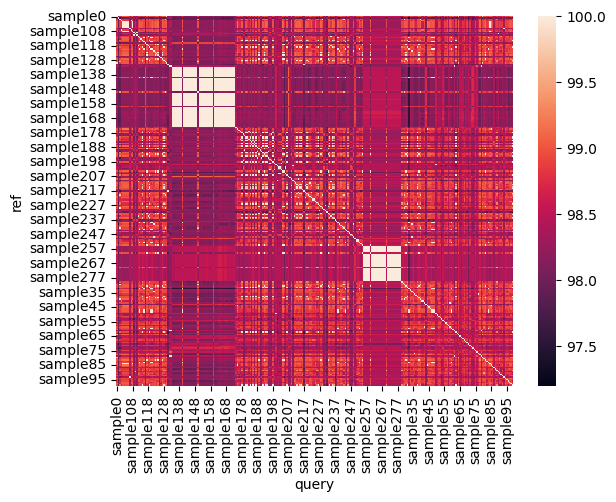

In [107]:
sns.heatmap(new_skani_matrix)

In [108]:
new_skani_matrix.describe()

query,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,98.654679,98.018464,98.520071,98.607893,98.661714,98.661000,98.661500,98.661071,98.661643,98.374536,...,98.568036,98.529464,98.607107,98.375536,98.648643,98.641321,98.549571,98.577214,98.617857,98.660321
std,0.336689,0.228950,0.487086,0.321140,0.405873,0.406498,0.406252,0.406656,0.406322,0.206668,...,0.338902,0.297469,0.311257,0.206598,0.322966,0.273770,0.364631,0.317144,0.348668,0.522076
min,97.940000,97.200000,97.590000,97.910000,97.950000,97.950000,97.950000,97.950000,97.950000,97.780000,...,97.940000,97.900000,97.850000,97.780000,98.010000,97.970000,97.830000,97.920000,97.840000,97.740000
25%,98.370000,97.880000,98.117500,98.307500,98.260000,98.260000,98.260000,98.260000,98.260000,98.230000,...,98.310000,98.290000,98.295000,98.230000,98.380000,98.430000,98.287500,98.290000,98.340000,98.260000
50%,98.690000,97.980000,98.560000,98.610000,98.710000,98.710000,98.710000,98.710000,98.710000,98.400000,...,98.610000,98.530000,98.625000,98.400000,98.745000,98.660000,98.585000,98.595000,98.700000,98.565000
75%,98.912500,98.160000,98.852500,98.900000,98.970000,98.970000,98.970000,98.970000,98.970000,98.480000,...,98.865000,98.760000,98.900000,98.480000,98.910000,98.860000,98.880000,98.852500,98.920000,98.900000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [109]:
dissimilarity_matrix = 100 - new_skani_matrix

Z = linkage(dissimilarity_matrix, method='average')
clusters = fcluster(Z, t=3, criterion='maxclust')

new_skani_matrix['Cluster'] = clusters

cluster_1_samples = new_skani_matrix.index[new_skani_matrix['Cluster'] == 1]
cluster_2_samples = new_skani_matrix.index[new_skani_matrix['Cluster'] == 2]

cluster_1_matrix = new_skani_matrix.loc[cluster_1_samples, cluster_1_samples]
cluster_2_matrix = new_skani_matrix.loc[cluster_2_samples, cluster_2_samples]

clusters

/var/folders/c4/74mrz72x32z07ktyfxzn15cw0000gn/T/ipykernel_10976/4042884866.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dissimilarity_matrix, method='average')


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [110]:
parsnp_diagonal_data = []
for sample in parsnp_sample_names:
    parsnp_diagonal_data.append({
        'p1': sample,
        'p2': sample,
        'diff': 0,
        'prc': 0,
        'ANI_1': 100,
        'ref': parsnp_mapper[sample],
        'query': parsnp_mapper[sample],
        'Tool': 'ParSNP'
    })

parsnp_diagonal_df = pd.DataFrame(parsnp_diagonal_data)
parsnp_matrix = pd.concat([parsnp_matrix, parsnp_diagonal_df], ignore_index=True)

parsnp_matrix = parsnp_matrix.sort_values(by=['p1', 'p2']).reset_index(drop=True)
parsnp_matrix = parsnp_matrix.drop_duplicates(['ref', 'query'])

parsnp_upper_triangle = parsnp_matrix.pivot_table(index='ref', columns='query', values='ANI_1').fillna(0) # bug here
parsnp_upper_triangle = parsnp_upper_triangle[sorted(parsnp_upper_triangle.columns)]

parsnp_lower_triangle = parsnp_matrix.pivot_table(index='query', columns='ref', values='ANI_1').fillna(0)
parsnp_lower_triangle = parsnp_lower_triangle[sorted(parsnp_lower_triangle.columns)]

new_parsnp_matrix = np.where(parsnp_upper_triangle != 0, parsnp_upper_triangle, parsnp_lower_triangle)

new_parsnp_matrix = pd.DataFrame(new_parsnp_matrix, 
                                 index=parsnp_upper_triangle.index, 
                                 columns=parsnp_upper_triangle.columns)

new_parsnp_matrix

query,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ref,,,,,,,,,,,,,,,,,,,,,
sample0,100.000000,85.139079,90.146230,90.009048,90.414757,90.416217,90.419135,90.417676,90.417676,87.377776,...,89.245790,90.022183,89.508479,87.380695,91.439246,89.699659,89.582908,90.467295,90.706634,90.276116
sample1,85.139079,100.000000,85.177023,85.525817,85.379878,85.381337,85.384256,85.388634,85.382797,87.843320,...,85.198914,85.261668,85.066110,87.846239,85.359447,85.231021,85.226643,85.125945,85.460144,85.137620
sample10,90.146230,85.177023,100.000000,90.918245,91.205744,91.207204,91.210122,91.207204,91.208663,87.065468,...,90.098071,90.775225,90.713931,87.066927,90.848195,90.595721,90.678906,91.195528,90.928461,94.501036
sample100,90.009048,85.525817,90.918245,100.000000,91.230554,91.232013,91.234932,91.230554,91.233472,87.903155,...,91.051049,92.411196,90.705175,87.906074,91.110884,90.678906,91.735501,91.588103,90.620531,91.128397
sample101,90.414757,85.379878,91.205744,91.230554,100.000000,99.992703,99.995622,99.991244,99.994162,87.246432,...,90.604477,91.729663,90.770847,87.249351,92.041972,91.185313,91.415896,91.630425,91.799714,91.645019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,89.699659,85.231021,90.595721,90.678906,91.185313,91.186772,91.189691,91.188232,91.188232,87.061090,...,89.950673,91.105047,89.925863,87.062549,91.342926,100.000000,90.640962,91.847874,91.345845,90.274656
sample96,89.582908,85.226643,90.678906,91.735501,91.415896,91.417355,91.420274,91.418814,91.418814,87.354426,...,90.678906,91.999650,90.845276,87.357345,90.951811,90.640962,100.000000,91.963165,90.497942,90.176877
sample97,90.467295,85.125945,91.195528,91.588103,91.630425,91.631885,91.634803,91.630425,91.633344,87.558740,...,90.556318,91.513674,90.948892,87.561659,92.155804,91.847874,91.963165,100.000000,92.104725,91.234932


In [111]:
# sns.color_palette()
# list(sns.color_palette())

In [112]:
sdf = parsnp_upper_triangle.melt(ignore_index=False).reset_index()
sdf = new_parsnp_matrix.melt(ignore_index=False).reset_index()
sdf[sdf.groupby('query')['value'].transform(max) == sdf['value']].sort_values('value')

/var/folders/c4/74mrz72x32z07ktyfxzn15cw0000gn/T/ipykernel_10976/1285123988.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sdf[sdf.groupby('query')['value'].transform(max) == sdf['value']].sort_values('value')


,ref,query,value
0,sample0,sample0,100.0
48894,sample255,sample255,100.0
48613,sample254,sample254,100.0
48332,sample253,sample253,100.0
48051,sample252,sample252,100.0
...,...,...,...
18245,sample139,sample157,100.0
18240,sample134,sample157,100.0
18001,sample171,sample156,100.0
17984,sample156,sample156,100.0


In [113]:
sample_name_df = pd.DataFrame({'skani': skani_sample_names,
                               'mummer': mummer_sample_names,
                               'parsnp': parsnp_sample_names})

# Ensure samples are ordered the same for all tools
sample_name_df

,skani,mummer,parsnp
0,GCA_018326705.1,GCA_018326705.1,GCA_018326705.1
1,GCA_018326785.1,GCA_018326785.1,GCA_018326785.1
2,GCA_018326825.1,GCA_018326825.1,GCA_018326825.1
3,GCA_018326845.1,GCA_018326845.1,GCA_018326845.1
4,GCA_018326905.1,GCA_018326905.1,GCA_018326905.1
...,...,...,...
275,flye.SQK-NBD114-96_barcode22,flye.SQK-NBD114-96_barcode22,flye.SQK-NBD114-96_barcode22
276,flye.SQK-NBD114-96_barcode23,flye.SQK-NBD114-96_barcode23,flye.SQK-NBD114-96_barcode23
277,flye.SQK-NBD114-96_barcode25,flye.SQK-NBD114-96_barcode25,flye.SQK-NBD114-96_barcode25
278,flye.SQK-NBD114-96_barcode26,flye.SQK-NBD114-96_barcode26,flye.SQK-NBD114-96_barcode26


Text(0.5, 1.0, 'B. breve skANI ANI Distribution')

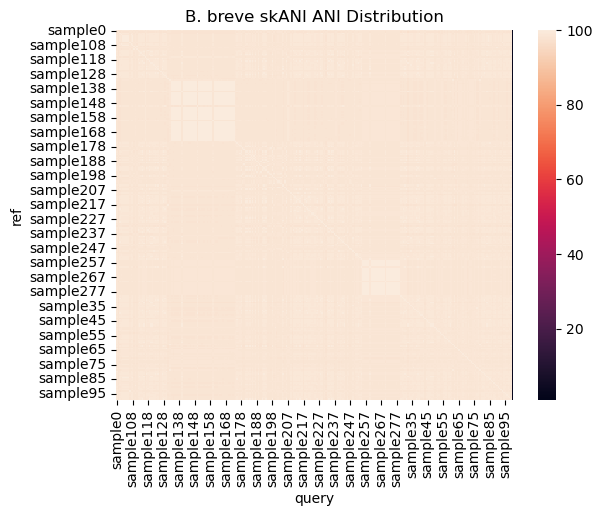

In [114]:
sns.heatmap(new_skani_matrix)
plt.title('B. breve skANI ANI Distribution')

Text(0.5, 1.0, 'B. breve MUMmer ANI Distribution')

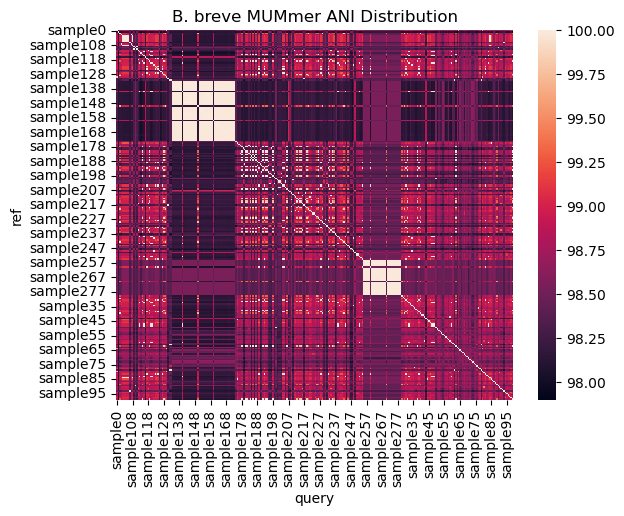

In [115]:
sns.heatmap(new_mummer_matrix)
plt.title('B. breve MUMmer ANI Distribution')

Text(0.5, 1.0, 'B. breve ParSNP ANI Distribution')

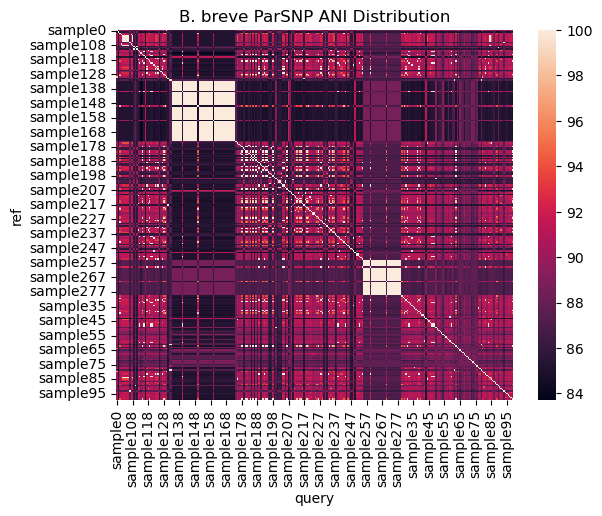

In [116]:
sns.heatmap(new_parsnp_matrix)
plt.title('B. breve ParSNP ANI Distribution')

IQTREE CLUSTERS

In [117]:
from sklearn.cluster import AgglomerativeClustering

new_parsnp_matrix_copy = new_parsnp_matrix.copy()
dissimilarity_matrix = 100 - new_parsnp_matrix_copy

def cluster_heatmaps(df, max_dist):
    clustering = AgglomerativeClustering(
        metric='precomputed', # will not recalculate distances
        linkage='average', # interested to see other linkages
        distance_threshold=max_dist,
        n_clusters=None
    )
    
    clusters = clustering.fit_predict(df) # assigns samples to clusters
    
    df['cluster'] = clusters
    print(df['cluster'])
    
    unique_clusters = df['cluster'].unique()
    print(f"# clusters: {len(unique_clusters)}")

    cluster_divergence_list = []
    
    for cluster_num in unique_clusters:
        cluster_samples = df.index[df['cluster'] == cluster_num]
        submatrix = df.loc[cluster_samples, cluster_samples]
        
        max_divergence = submatrix.max().max()
        print(f"cluster {cluster_num} max divergence: {max_divergence}")
        
        cluster_divergence_list.append({'cluster': cluster_num, 'max_divergence': max_divergence})
    
    divergence_df = pd.DataFrame(cluster_divergence_list)
    
    return df, divergence_df
        
        # plt.figure(figsize=(6, 5))
        # sns.heatmap(submatrix, cbar=True)
        # plt.title(f"Heatmap for Cluster {cluster_num + 1}")
        # plt.show()

max_clust = 3

dissimilarity_matrix_clusters, max_divergence_df = cluster_heatmaps(dissimilarity_matrix, max_clust)

ref
sample0      12
sample1      95
sample10     11
sample100    10
sample101    49
             ..
sample95     42
sample96     14
sample97     38
sample98     75
sample99      5
Name: cluster, Length: 280, dtype: int64
# clusters: 109
cluster 12 max divergence: 1.047838650360461
cluster 95 max divergence: 0.0
cluster 11 max divergence: 1.9687107790198723
cluster 10 max divergence: 0.010215697148368008
cluster 49 max divergence: 0.014593853069087004
cluster 19 max divergence: 0.008756311841452202
cluster 70 max divergence: 0.004378155920718996
cluster 24 max divergence: 0.01897200898982021
cluster 18 max divergence: 0.013134467762185409
cluster 8 max divergence: 0.05983479758326382
cluster 59 max divergence: 0.0
cluster 5 max divergence: 2.3058287849157892
cluster 68 max divergence: 0.0
cluster 3 max divergence: 0.770555442047808
cluster 39 max divergence: 0.007296926534550607
cluster 93 max divergence: 0.0
cluster 56 max divergence: 0.0
cluster 61 max divergence: 0.0
cluster 48 max d

In [118]:
dissimilarity_matrix_clusters

query,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99,cluster
ref,,,,,,,,,,,,,,,,,,,,,
sample0,0.000000,14.860921,9.853770,9.990952,9.585243,9.583783,9.580865,9.582324,9.582324,12.622224,...,9.977817,10.491521,12.619305,8.560754,10.300341,10.417092,9.532705,9.293366,9.723884,12
sample1,14.860921,0.000000,14.822977,14.474183,14.620122,14.618663,14.615744,14.611366,14.617203,12.156680,...,14.738332,14.933890,12.153761,14.640553,14.768979,14.773357,14.874055,14.539856,14.862380,95
sample10,9.853770,14.822977,0.000000,9.081755,8.794256,8.792796,8.789878,8.792796,8.791337,12.934532,...,9.224775,9.286069,12.933073,9.151805,9.404279,9.321094,8.804472,9.071539,5.498964,11
sample100,9.990952,14.474183,9.081755,0.000000,8.769446,8.767987,8.765068,8.769446,8.766528,12.096845,...,7.588804,9.294825,12.093926,8.889116,9.321094,8.264499,8.411897,9.379469,8.871603,10
sample101,9.585243,14.620122,8.794256,8.769446,0.000000,0.007297,0.004378,0.008756,0.005838,12.753568,...,8.270337,9.229153,12.750649,7.958028,8.814687,8.584104,8.369575,8.200286,8.354981,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,10.300341,14.768979,9.404279,9.321094,8.814687,8.813228,8.810309,8.811768,8.811768,12.938910,...,8.894953,10.074137,12.937451,8.657074,0.000000,9.359038,8.152126,8.654155,9.725344,42
sample96,10.417092,14.773357,9.321094,8.264499,8.584104,8.582645,8.579726,8.581186,8.581186,12.645574,...,8.000350,9.154724,12.642655,9.048189,9.359038,0.000000,8.036835,9.502058,9.823123,14
sample97,9.532705,14.874055,8.804472,8.411897,8.369575,8.368115,8.365197,8.369575,8.366656,12.441260,...,8.486326,9.051108,12.438341,7.844196,8.152126,8.036835,0.000000,7.895275,8.765068,38


In [119]:
max_divergence_df

,cluster,max_divergence
0,12,1.047839
1,95,0.000000
2,11,1.968711
3,10,0.010216
4,49,0.014594
...,...,...
104,47,0.000000
105,42,0.000000
106,14,0.000000
107,38,0.000000


In [120]:
singletons = max_divergence_df.query('max_divergence == 0')

# 74 singleton clusters

In [121]:
to_merge = dissimilarity_matrix['cluster'].reset_index()
to_merge

# merge with parsnp_matrix (on ref), then filter for ref and cluster to make iqtree file

,ref,cluster
0,sample0,12
1,sample1,95
2,sample10,11
3,sample100,10
4,sample101,49
...,...,...
275,sample95,42
276,sample96,14
277,sample97,38
278,sample98,75


In [122]:
to_merge['cluster'].unique()

array([ 12,  95,  11,  10,  49,  19,  70,  24,  18,   8,  59,   5,  68,
         3,  39,  93,  56,  61,  48,   4,  17,  73,  60,   6,  66,  41,
         9,  74, 102,  43,  32,   1,  50,  16,  90,  57,  36,  20,  15,
        89,   2,  34,  81,  94,   0,  54,  55,  96,  97,  83,  71,  91,
        82,  78,  23,  64,  37, 107,  85,  84,  80,  21,  72,   7,  88,
        67,  62,  99,  98, 108,  76,  92, 100, 105, 103,  58,  33,  65,
        53, 106,  79,  46,  69,  77,  27,  87,  63,  40, 104,  51,  28,
        44,  29,  45,  26, 101,  22,  35,  31,  86,  52,  30,  25,  13,
        47,  42,  14,  38,  75])

In [123]:
merged_parsnp = pd.merge(parsnp_matrix, to_merge, on='ref', how='left')
iqtree_parsnp = merged_parsnp[['p1', 'cluster']].drop_duplicates().reset_index().drop('index', axis=1)

unique_clusters = iqtree_parsnp['cluster'].unique()
palette = sns.color_palette(None, len(unique_clusters))

cluster_color_map = {cluster: f'rgba({color[0]*255:.2f},{color[1]*255:.2f},{color[2]*255:.2f},1.0)' 
                     for cluster, color in zip(unique_clusters, palette)}

iqtree_parsnp['colour'] = iqtree_parsnp['cluster'].map(cluster_color_map)
iqtree_parsnp

,p1,cluster,colour
0,GCA_018326705.1,12,"rgba(31.00,119.00,180.00,1.0)"
1,GCA_018326785.1,95,"rgba(255.00,127.00,14.00,1.0)"
2,GCA_018326825.1,1,"rgba(44.00,160.00,44.00,1.0)"
3,GCA_018326845.1,11,"rgba(214.00,39.00,40.00,1.0)"
4,GCA_018326905.1,11,"rgba(214.00,39.00,40.00,1.0)"
...,...,...,...
275,flye.SQK-NBD114-96_barcode22,37,"rgba(188.00,189.00,34.00,1.0)"
276,flye.SQK-NBD114-96_barcode23,37,"rgba(188.00,189.00,34.00,1.0)"
277,flye.SQK-NBD114-96_barcode25,37,"rgba(188.00,189.00,34.00,1.0)"
278,flye.SQK-NBD114-96_barcode26,37,"rgba(188.00,189.00,34.00,1.0)"


In [ ]:
with open('/home/ubuntu/wdir/PopGenStats_Project/data/B_breve/tree/iqtree.parsnp.renamed.treefile.annot.ahc_dist_avg.txt', 'w') as f:
    f.write("\n")
    f.write("        DATASET_COLORSTRIP\n\n")
    f.write("        SEPARATOR SPACE\n")
    f.write("        DATASET_LABEL ahc_dist_avg\n")
    f.write("        COLOR #ff0000\n\n")
    f.write("        COLOR_BRANCHES 0\n\n")
    f.write("        DATA\n\n")
    
    for _, row in iqtree_parsnp.iterrows():
        genome_id = row['p1']
        colour = row['colour']
        cluster = row['cluster']
        f.write(f"{genome_id} {colour} {cluster}\n")

In [125]:
m = iqtree_parsnp.merge(parsnp_snp_matrix)
m.rename(columns={"p1": "Ref_file"}, inplace=True)
m = m.merge(skani_matrix)
m

,Ref_file,cluster,colour,p2,diff,prc,Query_file,ANI,Align_fraction_ref,Align_fraction_query,Ref_name,Query_name,Tool,score1,score2,ref,query
0,GCA_018326705.1,12,"rgba(31.00,119.00,180.00,1.0)",GCF_000220135.1,7109,10.37477,GCA_018326705.1,100.00,100.00,100.00,,,skANI,100.000000,100.000000,sample0,sample0
1,GCA_018326705.1,12,"rgba(31.00,119.00,180.00,1.0)",GCF_000220135.1,7109,10.37477,GCA_018326785.1,97.94,82.72,78.85,BJIJ01000001.1 Bifidobacteriaceae bacterium MC...,BJIN01000001.1 Bifidobacteriaceae bacterium MC...,skANI,81.015968,77.225690,sample0,sample1
2,GCA_018326705.1,12,"rgba(31.00,119.00,180.00,1.0)",GCF_000220135.1,7109,10.37477,GCA_018326825.1,98.56,87.91,83.99,BJIJ01000001.1 Bifidobacteriaceae bacterium MC...,BJIP01000001.1 Bifidobacteriaceae bacterium MC...,skANI,86.644096,82.780544,sample0,sample2
3,GCA_018326705.1,12,"rgba(31.00,119.00,180.00,1.0)",GCF_000220135.1,7109,10.37477,GCA_018326845.1,98.90,89.51,82.13,BJIJ01000001.1 Bifidobacteriaceae bacterium MC...,BJIQ01000001.1 Bifidobacteriaceae bacterium MC...,skANI,88.525390,81.226570,sample0,sample3
4,GCA_018326705.1,12,"rgba(31.00,119.00,180.00,1.0)",GCF_000220135.1,7109,10.37477,GCA_018326905.1,99.02,89.73,81.82,BJIJ01000001.1 Bifidobacteriaceae bacterium MC...,BJIT01000001.1 Bifidobacteriaceae bacterium MC...,skANI,88.850646,81.018164,sample0,sample4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285482,flye.SQK-NBD114-96_barcode28,37,"rgba(188.00,189.00,34.00,1.0)",GCF_000158015.1,8833,12.89075,GCF_902505485.1,98.57,86.05,85.93,contig_1 rotated=True rotated_gene=dnaA,NZ_CABWJU010000001.1 Bifidobacterium breve iso...,skANI,84.819485,84.701201,sample279,sample251
5285483,flye.SQK-NBD114-96_barcode28,37,"rgba(188.00,189.00,34.00,1.0)",GCF_000158015.1,8833,12.89075,GCF_925281835.1,98.50,83.32,86.71,contig_1 rotated=True rotated_gene=dnaA,NZ_CAKMAR010000001.1 Bifidobacterium breve iso...,skANI,82.070200,85.409350,sample279,sample252
5285484,flye.SQK-NBD114-96_barcode28,37,"rgba(188.00,189.00,34.00,1.0)",GCF_000158015.1,8833,12.89075,GCF_925285005.1,98.31,85.36,82.00,contig_1 rotated=True rotated_gene=dnaA,NZ_CAKMBB010000001.1 Bifidobacterium breve iso...,skANI,83.917416,80.614200,sample279,sample253
5285485,flye.SQK-NBD114-96_barcode28,37,"rgba(188.00,189.00,34.00,1.0)",GCF_000158015.1,8833,12.89075,GCF_925318455.1,98.54,84.49,87.86,contig_1 rotated=True rotated_gene=dnaA,NZ_CAKMCX010000001.1 Bifidobacterium breve iso...,skANI,83.256446,86.577244,sample279,sample254


Text(0.5, 1.0, 'B. breve # of SNPs within Clusters')

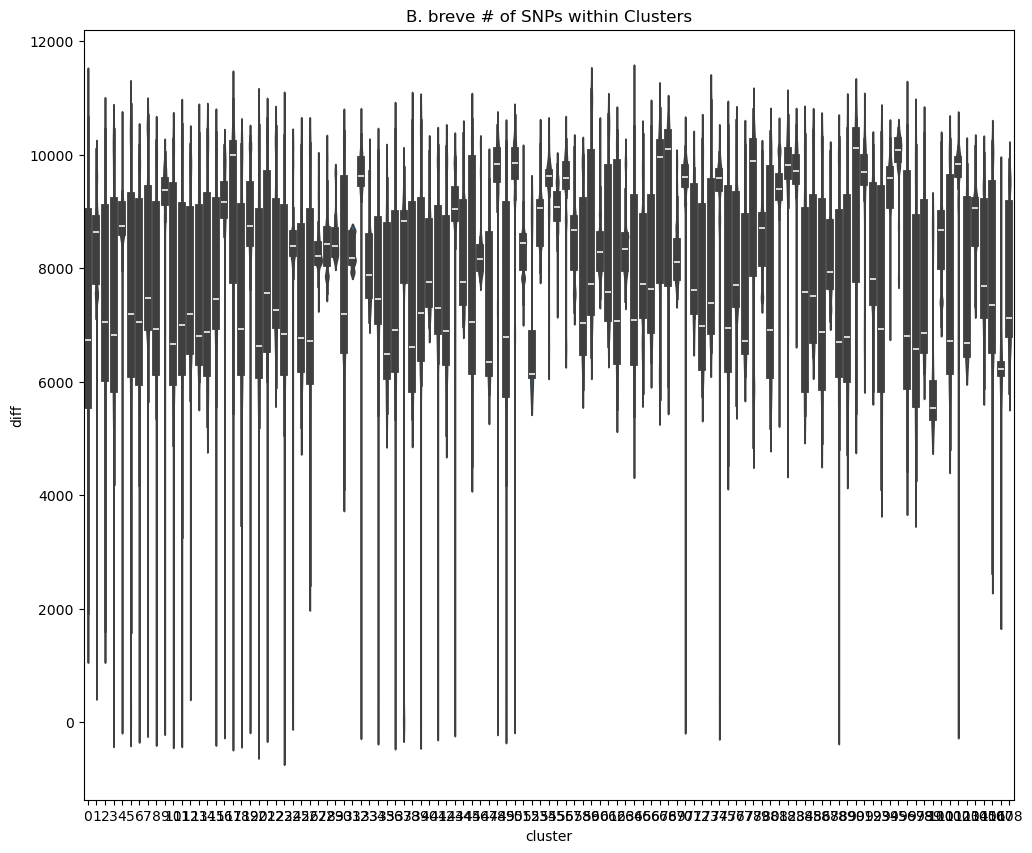

In [126]:
plt.figure(figsize=(12,10))
sns.violinplot(m, x='cluster', y='diff')
plt.title("B. breve # of SNPs within Clusters")

In [127]:
cluster_stats = m.groupby('cluster')['diff'].agg(['mean', 'median'])
cluster_stats

,mean,median
cluster,,
0,7185.805257,6734.0
1,8419.299913,8642.0
2,7471.506306,7056.0
3,7209.578181,6817.0
4,8828.488924,8739.0
...,...,...
104,8886.787879,9060.0
105,8008.264706,7684.0
106,7911.381132,7348.0


Text(0, 0.5, 'SNP count')

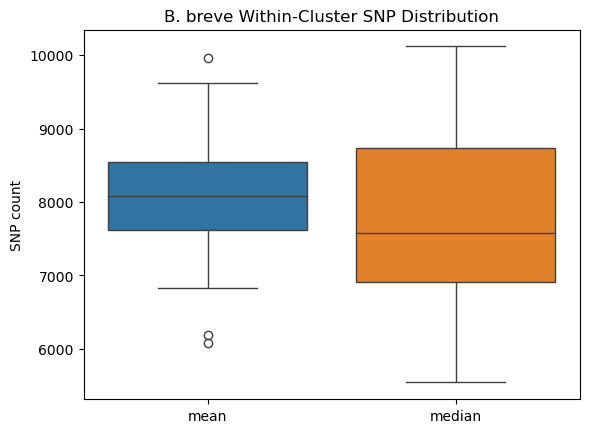

In [179]:
sns.boxplot(cluster_stats)
plt.title('B. breve Within-Cluster SNP Distribution')
plt.ylabel('SNP count')

In [181]:
cluster_stats.query('mean > 9800')

,mean,median
cluster,,
95,9966.387097,10073.0


In [129]:
# extract some of the clusters with large ranges
# generate scatterplot of ANI vs SNP distribution within the cluster

In [182]:
m_95 = m.query('cluster == 95')
m_95

,Ref_file,cluster,colour,p2,diff,prc,Query_file,ANI,Align_fraction_ref,Align_fraction_query,Ref_name,Query_name,Tool,score1,score2,ref,query
17085,GCA_018326785.1,95,"rgba(255.00,127.00,14.00,1.0)",GCF_001281425.1,10322,15.063775,GCA_018326785.1,100.00,100.00,100.00,,,skANI,100.000000,100.000000,sample1,sample1
17086,GCA_018326785.1,95,"rgba(255.00,127.00,14.00,1.0)",GCF_001281425.1,10322,15.063775,GCA_018326825.1,98.06,82.79,82.98,BJIN01000001.1 Bifidobacteriaceae bacterium MC...,BJIP01000001.1 Bifidobacteriaceae bacterium MC...,skANI,81.183874,81.370188,sample1,sample2
17087,GCA_018326785.1,95,"rgba(255.00,127.00,14.00,1.0)",GCF_001281425.1,10322,15.063775,GCA_018326845.1,98.01,78.58,75.64,BJIN01000001.1 Bifidobacteriaceae bacterium MC...,BJIQ01000001.1 Bifidobacteriaceae bacterium MC...,skANI,77.016258,74.134764,sample1,sample3
17088,GCA_018326785.1,95,"rgba(255.00,127.00,14.00,1.0)",GCF_001281425.1,10322,15.063775,GCA_018326905.1,97.98,78.59,75.17,BJIN01000001.1 Bifidobacteriaceae bacterium MC...,BJIT01000001.1 Bifidobacteriaceae bacterium MC...,skANI,77.002482,73.651566,sample1,sample4
17089,GCA_018326785.1,95,"rgba(255.00,127.00,14.00,1.0)",GCF_001281425.1,10322,15.063775,GCA_018326925.1,98.01,82.56,83.17,BJIN01000001.1 Bifidobacteriaceae bacterium MC...,BJIU01000001.1 Bifidobacteriaceae bacterium MC...,skANI,80.917056,81.514917,sample1,sample5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24954,GCA_018326785.1,95,"rgba(255.00,127.00,14.00,1.0)",GCF_000158015.1,10248,14.955781,GCF_902505445.1,98.13,83.47,83.03,BJIN01000001.1 Bifidobacteriaceae bacterium MC...,NZ_CABWKB010000001.1 Bifidobacterium breve iso...,skANI,81.909111,81.477339,sample1,sample250
24955,GCA_018326785.1,95,"rgba(255.00,127.00,14.00,1.0)",GCF_000158015.1,10248,14.955781,GCF_902505485.1,98.13,83.51,83.00,BJIN01000001.1 Bifidobacteriaceae bacterium MC...,NZ_CABWJU010000001.1 Bifidobacterium breve iso...,skANI,81.948363,81.447900,sample1,sample251
24956,GCA_018326785.1,95,"rgba(255.00,127.00,14.00,1.0)",GCF_000158015.1,10248,14.955781,GCF_925281835.1,97.86,79.82,82.68,BJIN01000001.1 Bifidobacteriaceae bacterium MC...,NZ_CAKMAR010000001.1 Bifidobacterium breve iso...,skANI,78.111852,80.910648,sample1,sample252
24957,GCA_018326785.1,95,"rgba(255.00,127.00,14.00,1.0)",GCF_000158015.1,10248,14.955781,GCF_925285005.1,98.17,82.85,79.22,BJIN01000001.1 Bifidobacteriaceae bacterium MC...,NZ_CAKMBB010000001.1 Bifidobacterium breve iso...,skANI,81.333845,77.770274,sample1,sample253


In [183]:
m_95['diff'].describe()

count     7874.000000
mean      9966.387097
std        494.316581
min       7818.000000
25%       9918.000000
50%      10073.000000
75%      10241.000000
max      10461.000000
Name: diff, dtype: float64

In [184]:
m95_mean = m_95.groupby('Ref_file')['ANI'].mean().reset_index()
m95_mean = m95_mean.merge(m_95[['Ref_file', 'diff']].drop_duplicates(), on='Ref_file')
m95_mean

,Ref_file,ANI,diff
0,GCA_018326785.1,98.004882,10322
1,GCA_018326785.1,98.004882,10073
2,GCA_018326785.1,98.004882,10170
3,GCA_018326785.1,98.004882,10053
4,GCA_018326785.1,98.004882,10256
5,GCA_018326785.1,98.004882,10374
6,GCA_018326785.1,98.004882,10072
7,GCA_018326785.1,98.004882,10166
8,GCA_018326785.1,98.004882,10157
9,GCA_018326785.1,98.004882,9781


Text(0.5, 1.0, 'B. breve Cluster 8 Number of SNPs vs Mean ANI')

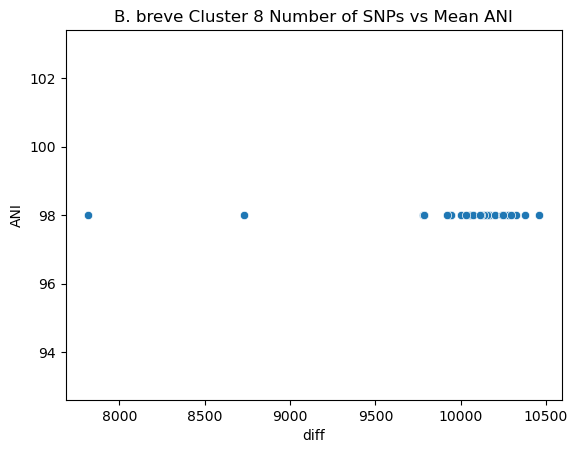

In [185]:
sns.scatterplot(m95_mean, x='diff', y='ANI')
plt.title("B. breve Cluster 8 Number of SNPs vs Mean ANI")

Text(-8.305555555555555, 0.5, 'SNP count')

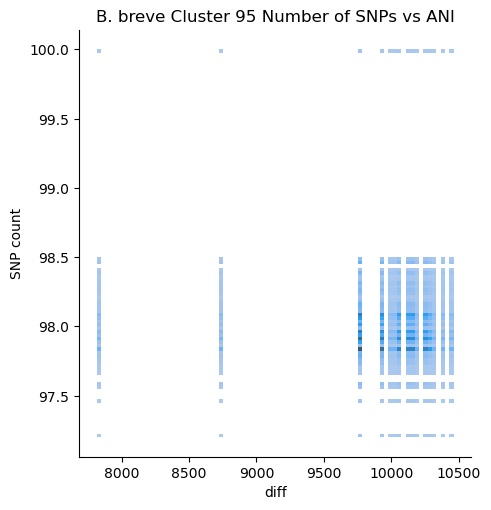

In [188]:
sns.displot(m_95, x='diff', y='ANI')
plt.title("B. breve Cluster 95 Number of SNPs vs ANI")
plt.ylabel('SNP count')

CLUSTERING

In [137]:
def get_clustered_matrix(distance_matrix, cluster_function, threshold, criterion, kwargs={}):
    
    a = np.array(distance_matrix)
    a = a[np.triu_indices_from(a, k=1)]
    
    try:
        clustering = cluster_function(a, metric=None, ** kwargs)
    except TypeError:
        clustering = cluster_function(a, ** kwargs)

    d = dict(zip(distance_matrix.index, fcluster(clustering, threshold, criterion)))
    order = sorted(d, key=lambda n: d.get(n))
    
    nframe = distance_matrix.copy()
    nframe = nframe[order]
    return nframe.reindex(order), d

def get_clusters_stats(res):
    matrix, clustering = res
    nclusters = len(set(clustering.values()))

    matrix = matrix.melt(ignore_index=False, value_name='distance').reset_index()
    matrix['ss1c'] = matrix['ref'].apply(lambda key: clustering[key])
    matrix['ss2c'] = matrix['query'].apply(lambda key: clustering[key])

    smatrix = matrix[matrix['ref'] != matrix['query']]
    same_smatrix = smatrix[smatrix['ss1c'] == smatrix['ss2c']]
    intra_sim = same_smatrix.groupby('ss1c')['distance'].describe().reset_index()

    notsame_smatrix = smatrix[smatrix['ss1c'] != smatrix['ss2c']]
    inter_sim = notsame_smatrix.groupby(['ss1c', 'ss2c'])['distance'].describe().reset_index()

    return nclusters, intra_sim, inter_sim

In [138]:
# matrices = {
#     'mummer': new_mummer_matrix,
#     'skani': new_skani_matrix,
#     'parsnp': new_parsnp_matrix
# }

# d = {
#     'single_distance_1': (single, 1, 'distance', {}),
#     'complete_distance_1': (complete, 1, 'distance', {}),
#     'avg_distance_1': (average, 1, 'distance', {}),
#     'single_distance_96': (single, 96.5, 'distance', {}),
#     'avg_distance_98': (average, 98.5, 'distance', {})
#     # 'avg_distance_50': (average, 50, 'distance', {}),
#     # 'avg_distance_75': (average, 75, 'distance', {}),
#     # 'avg_distance_80': (average, 80, 'distance', {}),
#     # 'avg_distance_85': (average, 85, 'distance', {})
#     # 'linkage_complete_distance_10': (linkage, 10, 'distance', {'method': 'complete'}),
#     # 'linkage_complete_distance_15': (linkage, 15, 'distance', {'method': 'complete'}),
#     # 'linkage_complete_distance_20': (linkage, 20, 'distance', {'method': 'complete'}),
#     # 'linkage_complete_distance_25': (linkage, 25, 'distance', {'method': 'complete'})
# }

# allres_ncluster = []
# allres_intra = []
# allres_inter = []

# for matrix_name, matrix in matrices.items():
#     for method_name, values in d.items():
#         res = get_clustered_matrix(matrix, *values)
#         stats = get_clusters_stats(res)
#         ncluster, intra, inter = stats
        
#         ncluster = len(set(res[1].values()))
#         allres_ncluster.append({
#             'method': method_name,
#             'nclusters': ncluster,
#             'matrix': matrix_name
#         })

#         intra['method'] = method_name
#         intra['matrix'] = matrix_name
#         allres_intra.append(intra)
        
#         inter['method'] = method_name
#         inter['matrix'] = matrix_name
#         allres_inter.append(inter)

#         colors = list(sns.color_palette())
#         colors = [colors[value % len(colors)] for value in sorted(res[1].values())]

#         sns.clustermap(res[0], row_cluster=False, col_cluster=False, row_colors=colors, col_colors=colors)
#         plt.title(method_name)
    
# allres_ncluster = pd.DataFrame(allres_ncluster)
# allres_inter = pd.concat(allres_inter)
# allres_intra = pd.concat(allres_intra)

# allres_intra['max'].max(), allres_inter['min'].min()

COMPUTE DISTANCE MATRICES

In [139]:
skani_dist_matrix = 100 - new_skani_matrix
mummer_dist_matrix = 100 - new_mummer_matrix
parsnp_dist_matrix = 100 - new_parsnp_matrix

In [140]:
if (mummer_dist_matrix < 0).any().any():
    raise ValueError("MUMmer distance matrix contains negative values")
if (skani_dist_matrix < 0).any().any():
    raise ValueError("skANI distance matrix contains negative values")
if (parsnp_dist_matrix < 0).any().any():
    raise ValueError("ParSNP distance matrix contains negative values")

THRESHOLD VS # CLUSTERS

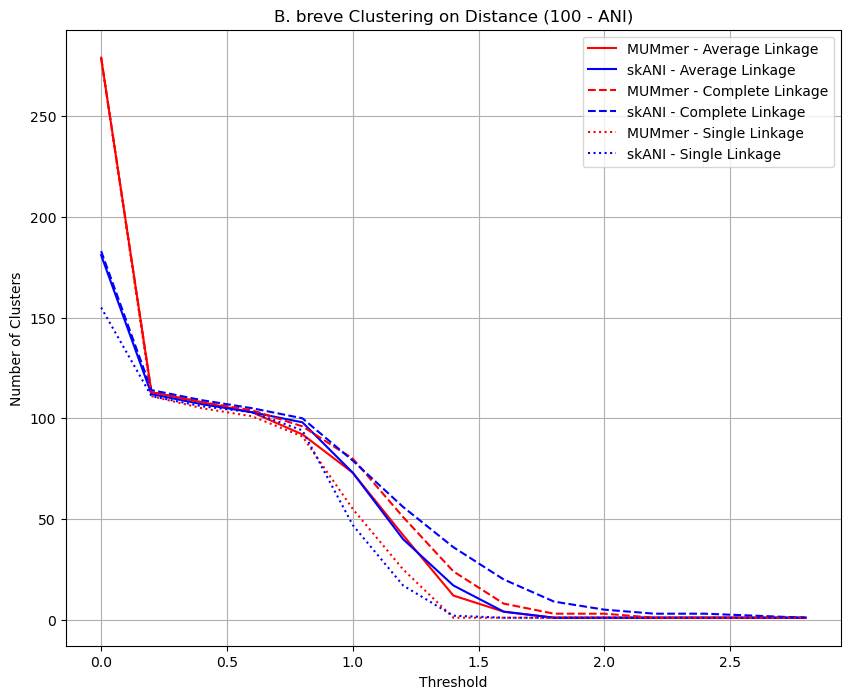

In [141]:
threshold_values = [i / 10 for i in range(0, 30, 2)]

mummer_results_avg, skani_results_avg = {}, {}
mummer_results_compl, skani_results_compl = {}, {}
mummer_results_single, skani_results_single = {}, {}

for threshold in threshold_values:
    # average
    mummer_res_a = get_clustered_matrix(mummer_dist_matrix, average, threshold, 'distance')
    skani_res_a = get_clustered_matrix(skani_dist_matrix, average, threshold, 'distance')

    mummer_clusters_a = mummer_res_a[1]
    skani_clusters_a = skani_res_a[1]

    num_mummer_clusters_a = len(set(mummer_clusters_a.values()))
    num_skani_clusters_a = len(set(skani_clusters_a.values()))

    mummer_results_avg[threshold] = num_mummer_clusters_a
    skani_results_avg[threshold] = num_skani_clusters_a

    # complete
    mummer_res_c = get_clustered_matrix(mummer_dist_matrix, complete, threshold, 'distance')
    skani_res_c = get_clustered_matrix(skani_dist_matrix, complete, threshold, 'distance')

    mummer_clusters_c = mummer_res_c[1]
    skani_clusters_c = skani_res_c[1]

    num_mummer_clusters_c = len(set(mummer_clusters_c.values()))
    num_skani_clusters_c = len(set(skani_clusters_c.values()))

    mummer_results_compl[threshold] = num_mummer_clusters_c
    skani_results_compl[threshold] = num_skani_clusters_c

    # single
    mummer_res_s = get_clustered_matrix(mummer_dist_matrix, single, threshold, 'distance')
    skani_res_s = get_clustered_matrix(skani_dist_matrix, single, threshold, 'distance')

    mummer_clusters_s = mummer_res_s[1]
    skani_clusters_s = skani_res_s[1]

    num_mummer_clusters_s = len(set(mummer_clusters_s.values()))
    num_skani_clusters_s = len(set(skani_clusters_s.values()))

    mummer_results_single[threshold] = num_mummer_clusters_s
    skani_results_single[threshold] = num_skani_clusters_s

plt.figure(figsize=(10, 8))

plt.plot(list(mummer_results_avg.keys()), list(mummer_results_avg.values()), 'r-', label='MUMmer - Average Linkage')
plt.plot(list(skani_results_avg.keys()), list(skani_results_avg.values()), 'b-', label='skANI - Average Linkage')

plt.plot(list(mummer_results_compl.keys()), list(mummer_results_compl.values()), 'r--', label='MUMmer - Complete Linkage')
plt.plot(list(skani_results_compl.keys()), list(skani_results_compl.values()), 'b--', label='skANI - Complete Linkage')

plt.plot(list(mummer_results_single.keys()), list(mummer_results_single.values()), 'r:', label='MUMmer - Single Linkage')
plt.plot(list(skani_results_single.keys()), list(skani_results_single.values()), 'b:', label='skANI - Single Linkage')

plt.title('B. breve Clustering on Distance (100 - ANI)')
plt.xlabel('Threshold')
plt.ylabel('Number of Clusters')
plt.grid(True)
plt.legend(loc='best')
plt.show()

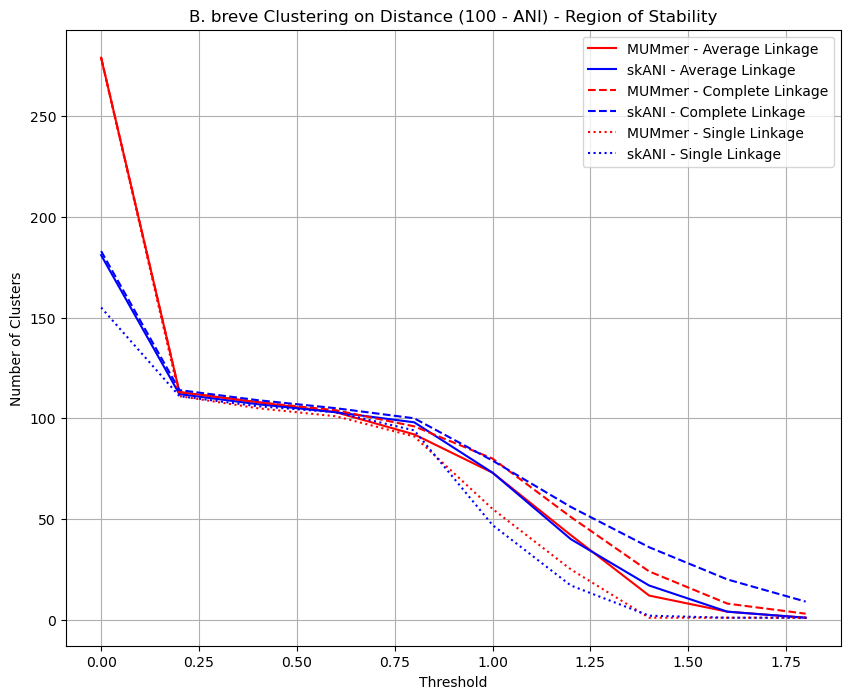

In [142]:
threshold_values = [i / 10 for i in range(0, 20, 2)]

mummer_results_avg, skani_results_avg = {}, {}
mummer_results_compl, skani_results_compl = {}, {}
mummer_results_single, skani_results_single = {}, {}

for threshold in threshold_values:
    # average
    mummer_res_a = get_clustered_matrix(mummer_dist_matrix, average, threshold, 'distance')
    skani_res_a = get_clustered_matrix(skani_dist_matrix, average, threshold, 'distance')

    mummer_clusters_a = mummer_res_a[1]
    skani_clusters_a = skani_res_a[1]

    num_mummer_clusters_a = len(set(mummer_clusters_a.values()))
    num_skani_clusters_a = len(set(skani_clusters_a.values()))

    mummer_results_avg[threshold] = num_mummer_clusters_a
    skani_results_avg[threshold] = num_skani_clusters_a

    # complete
    mummer_res_c = get_clustered_matrix(mummer_dist_matrix, complete, threshold, 'distance')
    skani_res_c = get_clustered_matrix(skani_dist_matrix, complete, threshold, 'distance')

    mummer_clusters_c = mummer_res_c[1]
    skani_clusters_c = skani_res_c[1]

    num_mummer_clusters_c = len(set(mummer_clusters_c.values()))
    num_skani_clusters_c = len(set(skani_clusters_c.values()))

    mummer_results_compl[threshold] = num_mummer_clusters_c
    skani_results_compl[threshold] = num_skani_clusters_c

    # single
    mummer_res_s = get_clustered_matrix(mummer_dist_matrix, single, threshold, 'distance')
    skani_res_s = get_clustered_matrix(skani_dist_matrix, single, threshold, 'distance')

    mummer_clusters_s = mummer_res_s[1]
    skani_clusters_s = skani_res_s[1]

    num_mummer_clusters_s = len(set(mummer_clusters_s.values()))
    num_skani_clusters_s = len(set(skani_clusters_s.values()))

    mummer_results_single[threshold] = num_mummer_clusters_s
    skani_results_single[threshold] = num_skani_clusters_s

plt.figure(figsize=(10, 8))

plt.plot(list(mummer_results_avg.keys()), list(mummer_results_avg.values()), 'r-', label='MUMmer - Average Linkage')
plt.plot(list(skani_results_avg.keys()), list(skani_results_avg.values()), 'b-', label='skANI - Average Linkage')

plt.plot(list(mummer_results_compl.keys()), list(mummer_results_compl.values()), 'r--', label='MUMmer - Complete Linkage')
plt.plot(list(skani_results_compl.keys()), list(skani_results_compl.values()), 'b--', label='skANI - Complete Linkage')

plt.plot(list(mummer_results_single.keys()), list(mummer_results_single.values()), 'r:', label='MUMmer - Single Linkage')
plt.plot(list(skani_results_single.keys()), list(skani_results_single.values()), 'b:', label='skANI - Single Linkage')

plt.title('B. breve Clustering on Distance (100 - ANI) - Region of Stability')
plt.xlabel('Threshold')
plt.ylabel('Number of Clusters')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [143]:
def get_y_for_x(x_value, results_dict):
    x_points = list(results_dict.keys())
    y_points = list(results_dict.values())
    
    y_interpolated = np.interp(x_value, x_points, y_points)
    return y_interpolated

x_value = 3

y_mummer_avg = get_y_for_x(x_value, mummer_results_avg)
y_skani_avg = get_y_for_x(x_value, skani_results_avg)

y_mummer_compl = get_y_for_x(x_value, mummer_results_compl)
y_skani_compl = get_y_for_x(x_value, skani_results_compl)

y_mummer_single = get_y_for_x(x_value, mummer_results_single)
y_skani_single = get_y_for_x(x_value, skani_results_single)

print(f"Y values for x = {x_value}:")
print(f"MUMmer - Average Linkage: {y_mummer_avg}")
print(f"skANI - Average Linkage: {y_skani_avg}")
print(f"MUMmer - Complete Linkage: {y_mummer_compl}")
print(f"skANI - Complete Linkage: {y_skani_compl}")
print(f"MUMmer - Single Linkage: {y_mummer_single}")
print(f"skANI - Single Linkage: {y_skani_single}")

Y values for x = 3:
MUMmer - Average Linkage: 1.0
skANI - Average Linkage: 1.0
MUMmer - Complete Linkage: 3.0
skANI - Complete Linkage: 9.0
MUMmer - Single Linkage: 1.0
skANI - Single Linkage: 1.0


COMPARING TOOLS

In [144]:
mummer_matrix_2 = mummer_matrix.copy()
mummer_matrix_2.rename(columns = {'avg_identity1':'ANI_1', 'avg_identity2':'ANI_2'}, inplace = True)
mummer_matrix_2

,prc_aligned1,prc_aligned2,ANI_1,ANI_2,s1,s2,Tool,score1,score2,ref,query
0,100.0000,100.0000,100.0000,100.0000,GCA_018326705.1,GCA_018326705.1,mummer,100.000000,100.000000,sample0,sample0
1,85.1615,81.2896,98.1306,98.1306,GCA_018326705.1,GCA_018326785.1,mummer,83.569491,79.769972,sample0,sample1
2,88.9774,85.1519,98.4529,98.4529,GCA_018326705.1,GCA_018326825.1,mummer,87.600831,83.834515,sample0,sample2
3,90.3609,83.0336,98.8533,98.8533,GCA_018326705.1,GCA_018326845.1,mummer,89.324732,82.081454,sample0,sample3
4,90.3920,82.5709,98.8428,98.8428,GCA_018326705.1,GCA_018326905.1,mummer,89.345984,81.615390,sample0,sample4
...,...,...,...,...,...,...,...,...,...,...,...
39335,86.8190,86.5532,98.5069,98.5069,flye.SQK-NBD114-96_barcode28,GCF_902505485.1,mummer,85.522706,85.260874,sample279,sample251
39336,84.5296,87.4827,98.4920,98.4920,flye.SQK-NBD114-96_barcode28,GCF_925281835.1,mummer,83.254894,86.163461,sample279,sample252
39337,86.6075,83.0494,98.4451,98.4451,flye.SQK-NBD114-96_barcode28,GCF_925285005.1,mummer,85.260840,81.758065,sample279,sample253
39338,85.3429,88.3598,98.5421,98.5421,flye.SQK-NBD114-96_barcode28,GCF_925318455.1,mummer,84.098686,87.071602,sample279,sample254


In [145]:
skani_matrix_2 = skani_matrix.copy()
skani_matrix_2.rename(columns = {'Ref_file': 's1', 'Query_file': 's2', 'ANI':'ANI_1', 'Align_fraction_ref': 'prc_aligned1', 'Align_fraction_query': 'prc_aligned2'}, inplace = True)
skani_matrix_2

,s1,s2,ANI_1,prc_aligned1,prc_aligned2,Ref_name,Query_name,Tool,score1,score2,ref,query
0,GCA_018326705.1,GCA_018326705.1,100.00,100.00,100.00,,,skANI,100.000000,100.000000,sample0,sample0
1,GCA_018326705.1,GCA_018326785.1,97.94,82.72,78.85,BJIJ01000001.1 Bifidobacteriaceae bacterium MC...,BJIN01000001.1 Bifidobacteriaceae bacterium MC...,skANI,81.015968,77.225690,sample0,sample1
2,GCA_018326705.1,GCA_018326825.1,98.56,87.91,83.99,BJIJ01000001.1 Bifidobacteriaceae bacterium MC...,BJIP01000001.1 Bifidobacteriaceae bacterium MC...,skANI,86.644096,82.780544,sample0,sample2
3,GCA_018326705.1,GCA_018326845.1,98.90,89.51,82.13,BJIJ01000001.1 Bifidobacteriaceae bacterium MC...,BJIQ01000001.1 Bifidobacteriaceae bacterium MC...,skANI,88.525390,81.226570,sample0,sample3
4,GCA_018326705.1,GCA_018326905.1,99.02,89.73,81.82,BJIJ01000001.1 Bifidobacteriaceae bacterium MC...,BJIT01000001.1 Bifidobacteriaceae bacterium MC...,skANI,88.850646,81.018164,sample0,sample4
...,...,...,...,...,...,...,...,...,...,...,...,...
39335,flye.SQK-NBD114-96_barcode28,GCF_902505485.1,98.57,86.05,85.93,contig_1 rotated=True rotated_gene=dnaA,NZ_CABWJU010000001.1 Bifidobacterium breve iso...,skANI,84.819485,84.701201,sample279,sample251
39336,flye.SQK-NBD114-96_barcode28,GCF_925281835.1,98.50,83.32,86.71,contig_1 rotated=True rotated_gene=dnaA,NZ_CAKMAR010000001.1 Bifidobacterium breve iso...,skANI,82.070200,85.409350,sample279,sample252
39337,flye.SQK-NBD114-96_barcode28,GCF_925285005.1,98.31,85.36,82.00,contig_1 rotated=True rotated_gene=dnaA,NZ_CAKMBB010000001.1 Bifidobacterium breve iso...,skANI,83.917416,80.614200,sample279,sample253
39338,flye.SQK-NBD114-96_barcode28,GCF_925318455.1,98.54,84.49,87.86,contig_1 rotated=True rotated_gene=dnaA,NZ_CAKMCX010000001.1 Bifidobacterium breve iso...,skANI,83.256446,86.577244,sample279,sample254


In [146]:
parsnp_matrix_2 = parsnp_matrix.copy()
parsnp_matrix_2.rename(columns = {'p1': 's1', 'p2': 's2'}, inplace = True)
parsnp_matrix_2

,s1,s2,diff,prc,Tool,ANI_1,ref,query,alignment_size
0,GCA_018326705.1,GCA_018326705.1,0,0.000000,ParSNP,100.000000,sample0,sample0,NaN
1,GCA_018326705.1,GCA_018326785.1,10183,14.860921,ParSNP,85.139079,sample0,sample1,68522.0
2,GCA_018326705.1,GCA_018326965.1,6689,9.761828,ParSNP,90.238172,sample0,sample6,68522.0
3,GCA_018326705.1,GCA_018327465.1,6689,9.761828,ParSNP,90.238172,sample0,sample14,68522.0
4,GCA_018326705.1,GCA_020783055.1,9691,14.142903,ParSNP,85.857097,sample0,sample19,68522.0
...,...,...,...,...,...,...,...,...,...
39615,flye.SQK-NBD114-96_barcode28,flye.SQK-NBD114-96_barcode15,2,0.002919,ParSNP,99.997081,sample279,sample268,68522.0
39616,flye.SQK-NBD114-96_barcode28,flye.SQK-NBD114-96_barcode17,1,0.001459,ParSNP,99.998541,sample279,sample270,68522.0
39617,flye.SQK-NBD114-96_barcode28,flye.SQK-NBD114-96_barcode18,1,0.001459,ParSNP,99.998541,sample279,sample271,68522.0
39618,flye.SQK-NBD114-96_barcode28,flye.SQK-NBD114-96_barcode26,2,0.002919,ParSNP,99.997081,sample279,sample278,68522.0


In [147]:
all_tools_df = pd.concat([mummer_matrix_2, skani_matrix_2, parsnp_matrix_2], ignore_index=True)
all_tools_df.rename(columns={'score1': 'aligned_bases'}, inplace=True)
all_tools_df

,prc_aligned1,prc_aligned2,ANI_1,ANI_2,s1,s2,Tool,aligned_bases,score2,ref,query,Ref_name,Query_name,diff,prc,alignment_size
0,100.0000,100.0000,100.000000,100.0000,GCA_018326705.1,GCA_018326705.1,mummer,100.000000,100.000000,sample0,sample0,NaN,NaN,NaN,NaN,NaN
1,85.1615,81.2896,98.130600,98.1306,GCA_018326705.1,GCA_018326785.1,mummer,83.569491,79.769972,sample0,sample1,NaN,NaN,NaN,NaN,NaN
2,88.9774,85.1519,98.452900,98.4529,GCA_018326705.1,GCA_018326825.1,mummer,87.600831,83.834515,sample0,sample2,NaN,NaN,NaN,NaN,NaN
3,90.3609,83.0336,98.853300,98.8533,GCA_018326705.1,GCA_018326845.1,mummer,89.324732,82.081454,sample0,sample3,NaN,NaN,NaN,NaN,NaN
4,90.3920,82.5709,98.842800,98.8428,GCA_018326705.1,GCA_018326905.1,mummer,89.345984,81.615390,sample0,sample4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118129,NaN,NaN,99.997081,NaN,flye.SQK-NBD114-96_barcode28,flye.SQK-NBD114-96_barcode15,ParSNP,NaN,NaN,sample279,sample268,NaN,NaN,2.0,0.002919,68522.0
118130,NaN,NaN,99.998541,NaN,flye.SQK-NBD114-96_barcode28,flye.SQK-NBD114-96_barcode17,ParSNP,NaN,NaN,sample279,sample270,NaN,NaN,1.0,0.001459,68522.0
118131,NaN,NaN,99.998541,NaN,flye.SQK-NBD114-96_barcode28,flye.SQK-NBD114-96_barcode18,ParSNP,NaN,NaN,sample279,sample271,NaN,NaN,1.0,0.001459,68522.0
118132,NaN,NaN,99.997081,NaN,flye.SQK-NBD114-96_barcode28,flye.SQK-NBD114-96_barcode26,ParSNP,NaN,NaN,sample279,sample278,NaN,NaN,2.0,0.002919,68522.0


In [148]:
melted_df = pd.melt(all_tools_df, id_vars=['Tool'], value_vars=['ANI_1', 'aligned_bases'], var_name='Type', value_name='ANI')
melted_df

,Tool,Type,ANI
0,mummer,ANI_1,100.0000
1,mummer,ANI_1,98.1306
2,mummer,ANI_1,98.4529
3,mummer,ANI_1,98.8533
4,mummer,ANI_1,98.8428
...,...,...,...
236263,ParSNP,aligned_bases,NaN
236264,ParSNP,aligned_bases,NaN
236265,ParSNP,aligned_bases,NaN
236266,ParSNP,aligned_bases,NaN


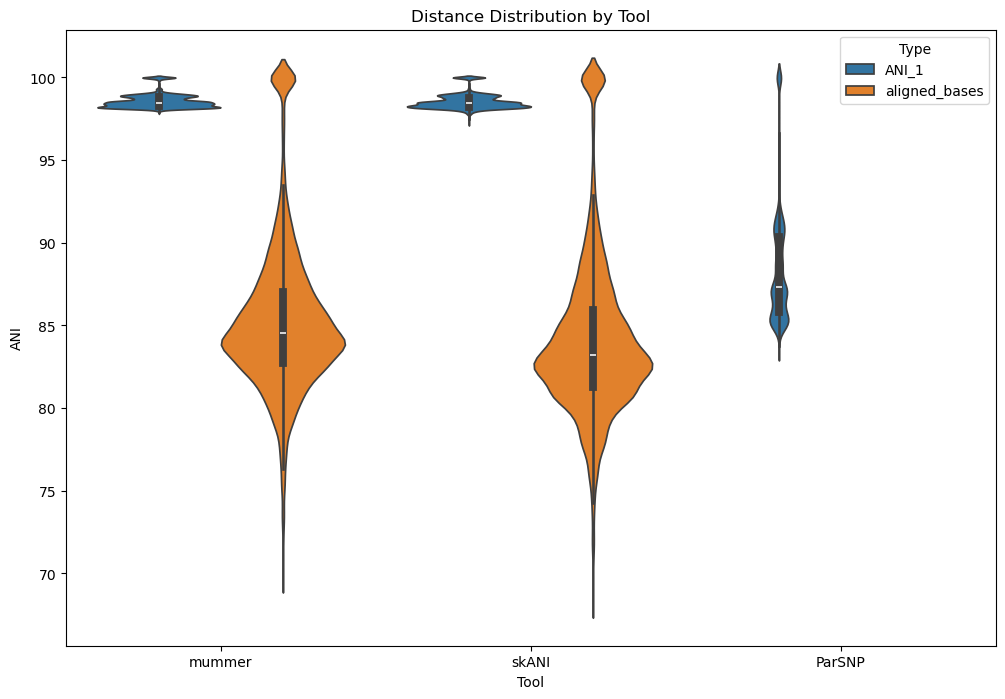

In [149]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=melted_df, x='Tool', y='ANI', hue='Type')
plt.title('Distance Distribution by Tool')
plt.show()

In [150]:
regplot_df = pd.DataFrame({'mummer_ref': mummer_matrix['s1'],
                           'skani_ref': skani_matrix['Ref_file'],
                           'parsnp_ref': parsnp_matrix['p1'],
                           'mummer_query': mummer_matrix['s2'],
                           'skani_query': skani_matrix['Query_file'],
                           'parsnp_query': parsnp_matrix['p2'],
                           'mummer_ANI': mummer_matrix['avg_identity1'],
                           'skani_ANI': skani_matrix['ANI'],
                           'parsnp_ANI': parsnp_matrix['ANI_1']})
regplot_df

,mummer_ref,skani_ref,parsnp_ref,mummer_query,skani_query,parsnp_query,mummer_ANI,skani_ANI,parsnp_ANI
0,GCA_018326705.1,GCA_018326705.1,GCA_018326705.1,GCA_018326705.1,GCA_018326705.1,GCA_018326705.1,100.0000,100.00,100.000000
1,GCA_018326705.1,GCA_018326705.1,GCA_018326705.1,GCA_018326785.1,GCA_018326785.1,GCA_018326785.1,98.1306,97.94,85.139079
2,GCA_018326705.1,GCA_018326705.1,GCA_018326705.1,GCA_018326825.1,GCA_018326825.1,GCA_018326965.1,98.4529,98.56,90.238172
3,GCA_018326705.1,GCA_018326705.1,GCA_018326705.1,GCA_018326845.1,GCA_018326845.1,GCA_018327465.1,98.8533,98.90,90.238172
4,GCA_018326705.1,GCA_018326705.1,GCA_018326705.1,GCA_018326905.1,GCA_018326905.1,GCA_020783055.1,98.8428,99.02,85.857097
...,...,...,...,...,...,...,...,...,...
39615,NaN,NaN,flye.SQK-NBD114-96_barcode28,NaN,NaN,flye.SQK-NBD114-96_barcode15,NaN,NaN,99.997081
39616,NaN,NaN,flye.SQK-NBD114-96_barcode28,NaN,NaN,flye.SQK-NBD114-96_barcode17,NaN,NaN,99.998541
39617,NaN,NaN,flye.SQK-NBD114-96_barcode28,NaN,NaN,flye.SQK-NBD114-96_barcode18,NaN,NaN,99.998541
39618,NaN,NaN,flye.SQK-NBD114-96_barcode28,NaN,NaN,flye.SQK-NBD114-96_barcode26,NaN,NaN,99.997081


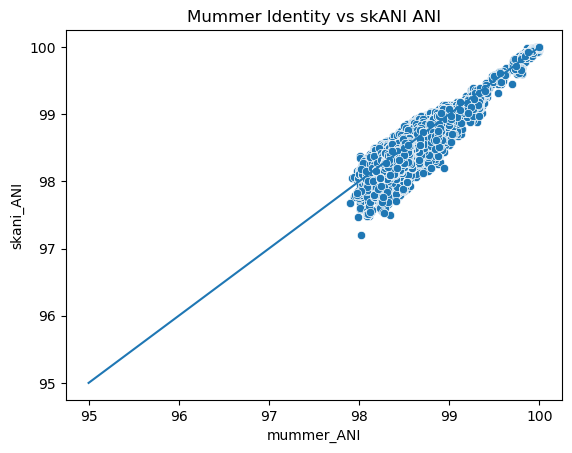

In [151]:
sns.scatterplot(data=regplot_df, x='mummer_ANI', y='skani_ANI')
plt.plot([95, 100], [95, 100])
plt.title("Mummer Identity vs skANI ANI")
plt.show()

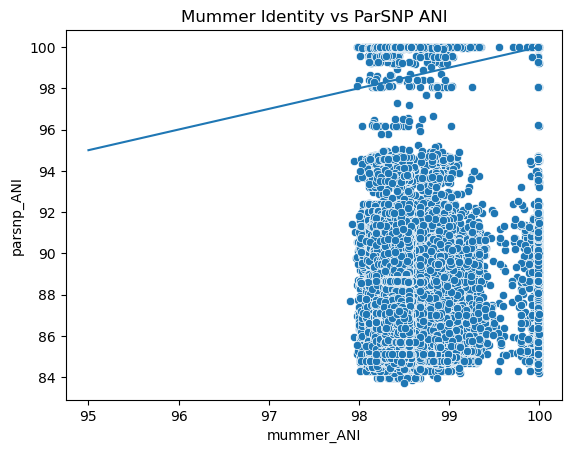

In [152]:
sns.scatterplot(data=regplot_df, x='mummer_ANI', y='parsnp_ANI')
plt.plot([95, 100], [95, 100])
plt.title("Mummer Identity vs ParSNP ANI")
plt.show()

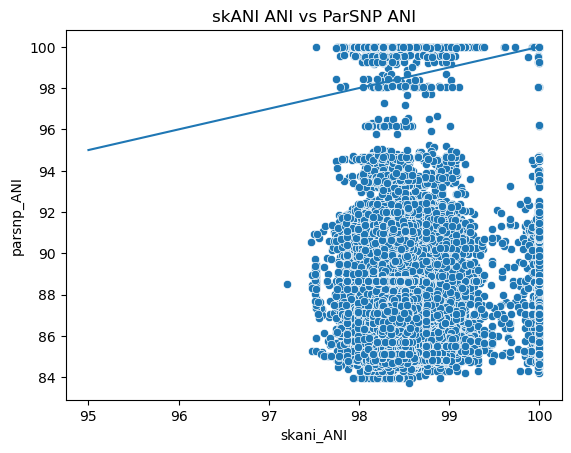

In [153]:
sns.scatterplot(data=regplot_df, x='skani_ANI', y='parsnp_ANI')
plt.plot([95, 100], [95, 100])
plt.title("skANI ANI vs ParSNP ANI")
plt.show()

DEREPLICATION TOOL COMPARISON

In [154]:
skder_matrix = pd.read_csv(skder_file_path, sep='\t')
skder_matrix['tool'] = 'skder'

skder_matrix['genome'] = skder_matrix['genome'].apply(edit_accession_id)
skder_matrix['nearest_representative_genome'] = skder_matrix['nearest_representative_genome'].apply(edit_accession_id)

skder_matrix.rename(columns={"nearest_representative_genome": "nearest_representative_genome(s)"}, inplace=True)

skder_matrix

,genome,nearest_representative_genome(s),average_nucleotide_identity,alignment_fraction,match_category,tool
0,GCF_027214675.1,GCF_027214675.1,100.00,100.00,representative_to_self,skder
1,GCF_003370175.1,GCF_003370175.1,100.00,100.00,representative_to_self,skder
2,GCF_003860285.1,GCF_003860285.1,100.00,100.00,representative_to_self,skder
3,GCF_028201995.1,GCF_028201995.1,100.00,100.00,representative_to_self,skder
4,GCF_001189355.1,GCF_001189355.1,100.00,100.00,representative_to_self,skder
...,...,...,...,...,...,...
274,GCF_027214985.1,GCA_018326905.1,99.32,89.18,outside_cutoffs_requested,skder
275,GCF_030230575.1,GCA_018326905.1,99.13,86.39,outside_cutoffs_requested,skder
276,GCF_002838565.1,GCA_018326905.1,99.28,88.20,outside_cutoffs_requested,skder
277,GCF_000466545.1,GCF_029011725.1,99.12,89.34,outside_cutoffs_requested,skder


In [155]:
skder_genome_counts = skder_matrix['nearest_representative_genome(s)'].value_counts()
skder_matrix['cluster_size'] = skder_matrix['nearest_representative_genome(s)'].map(skder_genome_counts).fillna(0).astype(int)
skder_matrix

,genome,nearest_representative_genome(s),average_nucleotide_identity,alignment_fraction,match_category,tool,cluster_size
0,GCF_027214675.1,GCF_027214675.1,100.00,100.00,representative_to_self,skder,3
1,GCF_003370175.1,GCF_003370175.1,100.00,100.00,representative_to_self,skder,1
2,GCF_003860285.1,GCF_003860285.1,100.00,100.00,representative_to_self,skder,1
3,GCF_028201995.1,GCF_028201995.1,100.00,100.00,representative_to_self,skder,2
4,GCF_001189355.1,GCF_001189355.1,100.00,100.00,representative_to_self,skder,4
...,...,...,...,...,...,...,...
274,GCF_027214985.1,GCA_018326905.1,99.32,89.18,outside_cutoffs_requested,skder,38
275,GCF_030230575.1,GCA_018326905.1,99.13,86.39,outside_cutoffs_requested,skder,38
276,GCF_002838565.1,GCA_018326905.1,99.28,88.20,outside_cutoffs_requested,skder,38
277,GCF_000466545.1,GCF_029011725.1,99.12,89.34,outside_cutoffs_requested,skder,13


In [156]:
skder_genome_counts.describe()

count    72.000000
mean      3.875000
std       7.468125
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      42.000000
Name: count, dtype: float64

In [157]:
skder_sample_names = sorted(set(skder_matrix['genome']) | set(skder_matrix['nearest_representative_genome(s)']))
skder_mapper = {name: f'sample{idx}' for idx, name in enumerate(skder_sample_names)}

skder_matrix['ref'] = skder_matrix['genome'].map(skder_mapper)
skder_matrix['query'] = skder_matrix['nearest_representative_genome(s)'].map(skder_mapper)

In [158]:
skder_clusters = skder_matrix.query('cluster_size != 0')
skder_clusters

,genome,nearest_representative_genome(s),average_nucleotide_identity,alignment_fraction,match_category,tool,cluster_size,ref,query
0,GCF_027214675.1,GCF_027214675.1,100.00,100.00,representative_to_self,skder,3,sample188,sample188
1,GCF_003370175.1,GCF_003370175.1,100.00,100.00,representative_to_self,skder,1,sample113,sample113
2,GCF_003860285.1,GCF_003860285.1,100.00,100.00,representative_to_self,skder,1,sample116,sample116
3,GCF_028201995.1,GCF_028201995.1,100.00,100.00,representative_to_self,skder,2,sample217,sample217
4,GCF_001189355.1,GCF_001189355.1,100.00,100.00,representative_to_self,skder,4,sample50,sample50
...,...,...,...,...,...,...,...,...,...
274,GCF_027214985.1,GCA_018326905.1,99.32,89.18,outside_cutoffs_requested,skder,38,sample194,sample4
275,GCF_030230575.1,GCA_018326905.1,99.13,86.39,outside_cutoffs_requested,skder,38,sample236,sample4
276,GCF_002838565.1,GCA_018326905.1,99.28,88.20,outside_cutoffs_requested,skder,38,sample99,sample4
277,GCF_000466545.1,GCF_029011725.1,99.12,89.34,outside_cutoffs_requested,skder,13,sample38,sample225


In [159]:
cidder_matrix = pd.read_csv(cidder_file_path, sep='\t')
cidder_matrix['tool'] = 'cidder'

cidder_matrix['genome'] = cidder_matrix['genome'].apply(edit_accession_id)
cidder_matrix['nearest_representative_genome(s)'] = cidder_matrix['nearest_representative_genome(s)'].apply(edit_accession_id)

cidder_matrix.rename(columns={"max_containment_of_genome_protein_clusters": "average_nucleotide_identity"}, inplace=True)

cidder_matrix

,genome,nearest_representative_genome(s),average_nucleotide_identity,genome_protein_cluster_count,representative_genome_protein_cluster_count,tool
0,GCF_000741125.1,GCF_000741125.1,100.000000,1945,1945,cidder
1,GCF_002838425.1,GCF_002838425.1,100.000000,2007,2007,cidder
2,GCF_028201875.1,GCF_028201875.1,100.000000,2063,2063,cidder
3,GCF_000568875.1,GCF_000568875.1,100.000000,1919,1919,cidder
4,GCF_902167575.1,GCF_902167575.1,100.000000,2009,2009,cidder
...,...,...,...,...,...,...
274,GCF_030216845.1,GCA_937980115.1,95.154420,1878,2026,cidder
275,GCA_018326965.1,GCF_000741125.1,93.319524,1931,2026,cidder
276,GCF_001264035.1,GCF_028203585.1,84.940691,1939,2026,cidder
277,GCF_002838625.1,GCF_002838745.1,98.133748,1929,2026,cidder


In [160]:
cidder_genome_counts = cidder_matrix['nearest_representative_genome(s)'].value_counts()
cidder_matrix['cluster_size'] = cidder_matrix['nearest_representative_genome(s)'].map(cidder_genome_counts).fillna(0).astype(int)
cidder_matrix

,genome,nearest_representative_genome(s),average_nucleotide_identity,genome_protein_cluster_count,representative_genome_protein_cluster_count,tool,cluster_size
0,GCF_000741125.1,GCF_000741125.1,100.000000,1945,1945,cidder,14
1,GCF_002838425.1,GCF_002838425.1,100.000000,2007,2007,cidder,1
2,GCF_028201875.1,GCF_028201875.1,100.000000,2063,2063,cidder,7
3,GCF_000568875.1,GCF_000568875.1,100.000000,1919,1919,cidder,1
4,GCF_902167575.1,GCF_902167575.1,100.000000,2009,2009,cidder,2
...,...,...,...,...,...,...,...
274,GCF_030216845.1,GCA_937980115.1,95.154420,1878,2026,cidder,13
275,GCA_018326965.1,GCF_000741125.1,93.319524,1931,2026,cidder,14
276,GCF_001264035.1,GCF_028203585.1,84.940691,1939,2026,cidder,13
277,GCF_002838625.1,GCF_002838745.1,98.133748,1929,2026,cidder,7


In [161]:
cidder_genome_counts.describe()

count    85.000000
mean      3.282353
std       5.716750
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max      42.000000
Name: count, dtype: float64

In [162]:
drep_matrix = pd.read_csv(drep_file_path)
drep_matrix['tool'] = 'drep'

drep_matrix['genome'] = drep_matrix['genome'].apply(edit_accession_id)

drep_matrix.groupby('secondary_cluster')

drep_matrix

,genome,secondary_cluster,threshold,cluster_method,comparison_algorithm,primary_cluster,tool
0,GCF_002838445.1,1_1,0.01,average,fastANI,1,drep
1,GCF_002838705.1,1_1,0.01,average,fastANI,1,drep
2,GCF_030441965.1,1_2,0.01,average,fastANI,1,drep
3,GCF_901212525.1,1_3,0.01,average,fastANI,1,drep
4,GCF_902167875.1,1_4,0.01,average,fastANI,1,drep
...,...,...,...,...,...,...,...
275,GCF_001990225.1,1_83,0.01,average,fastANI,1,drep
276,GCF_002076055.1,1_83,0.01,average,fastANI,1,drep
277,GCF_016648955.1,1_83,0.01,average,fastANI,1,drep
278,GCF_016648985.1,1_83,0.01,average,fastANI,1,drep


In [163]:
drep_num_clusters = len(drep_matrix['secondary_cluster'].unique())
drep_num_clusters

84

In [164]:
drep_genome_counts = drep_matrix['secondary_cluster'].value_counts()
drep_matrix['cluster_size'] = drep_matrix['secondary_cluster'].map(drep_genome_counts).fillna(0).astype(int)
drep_matrix

,genome,secondary_cluster,threshold,cluster_method,comparison_algorithm,primary_cluster,tool,cluster_size
0,GCF_002838445.1,1_1,0.01,average,fastANI,1,drep,2
1,GCF_002838705.1,1_1,0.01,average,fastANI,1,drep,2
2,GCF_030441965.1,1_2,0.01,average,fastANI,1,drep,1
3,GCF_901212525.1,1_3,0.01,average,fastANI,1,drep,1
4,GCF_902167875.1,1_4,0.01,average,fastANI,1,drep,1
...,...,...,...,...,...,...,...,...
275,GCF_001990225.1,1_83,0.01,average,fastANI,1,drep,5
276,GCF_002076055.1,1_83,0.01,average,fastANI,1,drep,5
277,GCF_016648955.1,1_83,0.01,average,fastANI,1,drep,5
278,GCF_016648985.1,1_83,0.01,average,fastANI,1,drep,5


In [165]:
drep_genome_counts.describe()

count    84.000000
mean      3.333333
std       7.417552
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      42.000000
Name: count, dtype: float64

In [166]:
galah_matrix = pd.read_csv(galah_file_path, sep='\t')
galah_matrix.columns = ['nearest_representative_genome(s)', 'genome']
galah_matrix['tool'] = 'galah'

galah_matrix['genome'] = galah_matrix['genome'].apply(edit_accession_id)
galah_matrix['nearest_representative_genome(s)'] = galah_matrix['nearest_representative_genome(s)'].apply(edit_accession_id)

galah_matrix

,nearest_representative_genome(s),genome,tool
0,GCF_001685765.1,GCF_001685765.1,galah
1,GCF_001685885.1,GCF_001685885.1,galah
2,GCF_014779815.1,GCF_014779815.1,galah
3,GCF_001685925.1,GCF_001685925.1,galah
4,GCF_002838445.1,GCF_002838445.1,galah
...,...,...,...
274,GCF_028203455.1,GCF_001264095.1,galah
275,GCF_028203455.1,GCF_001685805.1,galah
276,GCF_029723395.1,GCF_029723395.1,galah
277,GCF_029723395.1,GCF_029723755.1,galah


In [167]:
galah_num_clusters = len(galah_matrix['nearest_representative_genome(s)'].unique())
galah_num_clusters

53

In [168]:
galah_genome_counts = galah_matrix['nearest_representative_genome(s)'].value_counts()
galah_matrix['cluster_size'] = galah_matrix['nearest_representative_genome(s)'].map(galah_genome_counts).fillna(0).astype(int)
galah_matrix

,nearest_representative_genome(s),genome,tool,cluster_size
0,GCF_001685765.1,GCF_001685765.1,galah,1
1,GCF_001685885.1,GCF_001685885.1,galah,1
2,GCF_014779815.1,GCF_014779815.1,galah,1
3,GCF_001685925.1,GCF_001685925.1,galah,1
4,GCF_002838445.1,GCF_002838445.1,galah,2
...,...,...,...,...
274,GCF_028203455.1,GCF_001264095.1,galah,4
275,GCF_028203455.1,GCF_001685805.1,galah,4
276,GCF_029723395.1,GCF_029723395.1,galah,3
277,GCF_029723395.1,GCF_029723755.1,galah,3


In [169]:
galah_matrix['nearest_representative_genome(s)'].value_counts().describe()

count    53.000000
mean      5.264151
std      10.280959
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      48.000000
Name: count, dtype: float64

In [170]:
skder_num_clusters = skder_genome_counts.count()
cidder_num_clusters = cidder_genome_counts.count()

d = {"skder": [skder_num_clusters],
     "cidder": [cidder_num_clusters],
     "drep": [drep_num_clusters],
     "galah": [galah_num_clusters]}

derep_cl_count = pd.DataFrame(d)
derep_cl_count

,skder,cidder,drep,galah
0,72,85,84,53


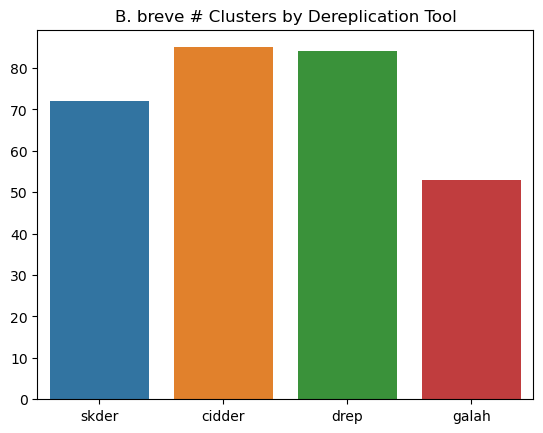

In [171]:
sns.barplot(derep_cl_count)
plt.title('B. breve # Clusters by Dereplication Tool')
plt.show()

In [172]:
derep_merged_df = pd.concat([skder_matrix, cidder_matrix, drep_matrix, galah_matrix])
derep_merged_df

,genome,nearest_representative_genome(s),average_nucleotide_identity,alignment_fraction,match_category,tool,cluster_size,ref,query,genome_protein_cluster_count,representative_genome_protein_cluster_count,secondary_cluster,threshold,cluster_method,comparison_algorithm,primary_cluster
0,GCF_027214675.1,GCF_027214675.1,100.0,100.0,representative_to_self,skder,3,sample188,sample188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GCF_003370175.1,GCF_003370175.1,100.0,100.0,representative_to_self,skder,1,sample113,sample113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GCF_003860285.1,GCF_003860285.1,100.0,100.0,representative_to_self,skder,1,sample116,sample116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GCF_028201995.1,GCF_028201995.1,100.0,100.0,representative_to_self,skder,2,sample217,sample217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GCF_001189355.1,GCF_001189355.1,100.0,100.0,representative_to_self,skder,4,sample50,sample50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,GCF_001264095.1,GCF_028203455.1,NaN,NaN,NaN,galah,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,GCF_001685805.1,GCF_028203455.1,NaN,NaN,NaN,galah,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,GCF_029723395.1,GCF_029723395.1,NaN,NaN,NaN,galah,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,GCF_029723755.1,GCF_029723395.1,NaN,NaN,NaN,galah,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


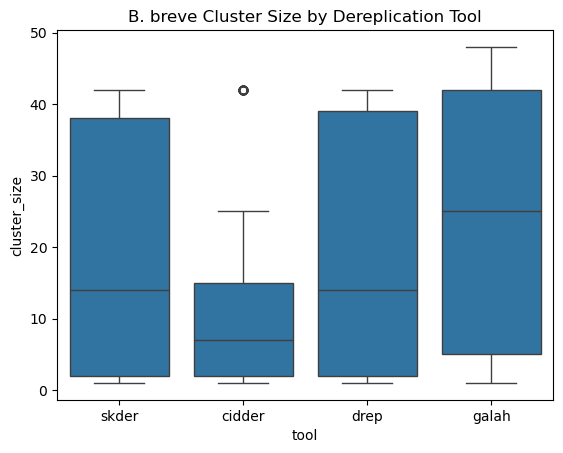

In [173]:
derep_boxplot = sns.boxplot(derep_merged_df,
                            x='tool',
                            y='cluster_size')
plt.title('B. breve Cluster Size by Dereplication Tool')
plt.show()

In [174]:
median_cluster_sizes = derep_merged_df.groupby('tool')['cluster_size'].median().reset_index()
median_cluster_sizes

,tool,cluster_size
0,cidder,7.0
1,drep,14.0
2,galah,25.0
3,skder,14.0


In [175]:
mean_cluster_sizes = derep_merged_df.groupby('tool')['cluster_size'].mean().reset_index()
mean_cluster_sizes

,tool,cluster_size
0,cidder,13.121864
1,drep,19.642857
2,galah,24.964158
3,skder,18.068100


In [176]:
merged_df = skder_matrix[['genome', 'nearest_representative_genome(s)']].merge(
    cidder_matrix[['genome', 'nearest_representative_genome(s)']], on='genome', suffixes=('_skder', '_cidder')
).merge(
    drep_matrix[['genome', 'secondary_cluster']], on='genome'
).merge(
    galah_matrix[['genome', 'nearest_representative_genome(s)']], on='genome', suffixes=('_drep', '_galah')
)

tools = ['skder', 'cidder', 'drep', 'galah']
columns = ['nearest_representative_genome(s)_skder', 'nearest_representative_genome(s)_cidder', 
           'secondary_cluster', 'nearest_representative_genome(s)']

In [177]:
ari_results = []

for i in range(len(tools)):
    for j in range(i + 1, len(tools)):
        tool_1 = columns[i]
        tool_2 = columns[j]
        
        ari = adjusted_rand_score(merged_df[tool_1], merged_df[tool_2])
        
        ari_results.append({'tool 1': tools[i], 'tool 2': tools[j], 'ARI': ari})

ari_df = pd.DataFrame(ari_results)
ari_df

,tool 1,tool 2,ARI
0,skder,cidder,0.734394
1,skder,drep,0.765138
2,skder,galah,0.680272
3,cidder,drep,0.730924
4,cidder,galah,0.608696
5,drep,galah,0.748731


In [178]:
def create_pairwise_matrix(cluster_labels):
    n = len(cluster_labels)
    pairwise_matrix = pd.DataFrame(0, index=range(n), columns=range(n))
    
    for i in range(n):
        for j in range(i, n):
            if cluster_labels[i] == cluster_labels[j]:  # Same cluster
                pairwise_matrix.at[i, j] = 1
                pairwise_matrix.at[j, i] = 1
    return pairwise_matrix

def calculate_jaccard_index(pairwise_matrix_1, pairwise_matrix_2):
    matrix_1_flat = pairwise_matrix_1.values.flatten()
    matrix_2_flat = pairwise_matrix_2.values.flatten()
    
    return jaccard_score(matrix_1_flat, matrix_2_flat)

tools = ['skder', 'cidder', 'drep', 'galah']
columns = ['nearest_representative_genome(s)_skder', 'nearest_representative_genome(s)_cidder', 
           'secondary_cluster', 'nearest_representative_genome(s)']

jaccard_results = []

pairwise_matrices = {}
for tool, column in zip(tools, columns):
    pairwise_matrices[tool] = create_pairwise_matrix(merged_df[column].values)

for tool_1, tool_2 in combinations(tools, 2):
    pairwise_matrix_1 = pairwise_matrices[tool_1]
    pairwise_matrix_2 = pairwise_matrices[tool_2]
    
    jaccard_index = calculate_jaccard_index(pairwise_matrix_1, pairwise_matrix_2)
    
    jaccard_results.append({'tool 1': tool_1, 'tool 2': tool_2, 'Jaccard Index': jaccard_index})

jaccard_df = pd.DataFrame(jaccard_results)
jaccard_df

,tool 1,tool 2,Jaccard Index
0,skder,cidder,0.618304
1,skder,drep,0.655499
2,skder,galah,0.558954
3,cidder,drep,0.613911
4,cidder,galah,0.482429
5,drep,galah,0.636823
